In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [3]:
df = pd.read_csv('working')
df

,Unnamed: 0,ingredients,url,partition,title,id,instructions,Nutritions,Serving
0,0,"[{'text': '4 cups water'}, {'text': '4 chai te...",http://www.food.com/recipe/creamy-chai-iced-te...,test,Creamy Chai Iced Tea,1b9b580693,"[{'text': 'In a small saucepan, bring water to...","{'calories': '122.8', 'fatContent': '3.3', 'sa...",280.0
1,1,"[{'text': '1 tablespoon pesto sauce'}, {'text'...",http://www.food.com/recipe/chicken-pesto-salad...,train,Chicken Pesto Salad,1b9b5e6e46,[{'text': 'Mix pesto with yogurt and cayenne.'...,"{'calories': '72.9', 'fatContent': '1.3', 'sat...",227.0
2,2,"[{'text': '12 cup vegetable oil, plus more for...",http://www.food.com/recipe/passover-popovers-2...,test,Passover Popovers,1b9b8874da,"[{'text': 'Preheat oven to 375 degrees.'}, {'t...","{'calories': '117.3', 'fatContent': '10.7', 's...",36.0
3,3,[{'text': '12 lb dried white bean (Great North...,http://www.food.com/recipe/ribollita-ina-garte...,test,Ribollita (Ina Garten),1b9b9b2ad2,"[{'text': 'In a large bowl, cover the beans wi...","{'calories': '302.8', 'fatContent': '11.3', 's...",364.0
4,4,[{'text': '12 cup butter or 12 cup margarine'}...,http://www.food.com/recipe/coconut-chocolate-t...,test,Coconut Chocolate Thumbprints,1b9bbbb53b,[{'text': 'Melt butter over low heat in a medi...,"{'calories': '150.2', 'fatContent': '8.9', 'sa...",777.0
...,...,...,...,...,...,...,...,...,...
4995,4995,[{'text': '2 -3 black cod fish fillets (about ...,http://www.food.com/recipe/black-cod-with-miso...,train,Black Cod With Miso,1e197b8902,"[{'text': '1.'}, {'text': 'Mix the marinate in...","{'calories': '192.2', 'fatContent': '1.8', 'sa...",171.0
4996,4996,"[{'text': '8 ounces chocolate, coarsely choppe...",http://www.food.com/recipe/ultimate-bitterswee...,val,Ultimate Bittersweet Brownie,1e19972227,[{'text': 'Set rack in center of the oven and ...,"{'calories': '177', 'fatContent': '12.4', 'sat...",41.0
4997,4997,"[{'text': '1 lb poppy seed'}, {'text': '3 eggs...",http://www.food.com/recipe/poppy-seed-cookies-...,val,Poppy Seed Cookies,1e19ac4d80,"[{'text': 'Grind poppy seeds to a paste.'}, {'...","{'calories': '70', 'fatContent': '5.2', 'satur...",16.0
4998,4998,"[{'text': '14 cup milk'}, {'text': '1 teaspoon...",http://www.food.com/recipe/birthday-cake-frapp...,train,Birthday Cake Frappuccino,1e19b00bbc,[{'text': 'Place all ingredients in blender in...,"{'calories': '360.7', 'fatContent': '16.8', 's...",446.0


In [4]:
df.dropna(inplace=True)

In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:

import ast
import pandas as pd


dict_df = pd.DataFrame([ast.literal_eval(i) for i in df.Nutritions.values])


In [7]:

dict_df

,calories,fatContent,saturatedFatContent,cholesterolContent,sodiumContent,carbohydrateContent,fiberContent,sugarContent,proteinContent
0,122.8,3.3,2.1,13,53.3,20.8,0,20.8,3
1,72.9,1.3,0.7,3.7,68,12.1,2.1,8.8,4.7
2,117.3,10.7,1.7,62,121,3.1,0.1,1.1,2.3
3,302.8,11.3,2.7,10.9,405.3,36.1,7.6,7,16.4
4,150.2,8.9,6.3,10.2,51.8,18.8,0.8,17.6,0.6
...,...,...,...,...,...,...,...,...,...
4991,192.2,1.8,0.3,49.7,794.3,15.6,0.9,10.7,22.7
4992,177,12.4,7.5,37.9,42.9,18.8,2.4,12.7,2.9
4993,70,5.2,0.9,14.7,26.4,4.3,1,1.3,2.4
4994,360.7,16.8,10.3,66.6,144.1,36.1,0.9,30.1,6.6


In [8]:
df.drop(['Nutritions'],axis=1, inplace = True)
# df = pd.concat([df,dict_df],axis=1)




In [9]:
df = df.join(dict_df)

In [10]:
df

,Unnamed: 0,ingredients,url,partition,title,id,instructions,Serving,calories,fatContent,saturatedFatContent,cholesterolContent,sodiumContent,carbohydrateContent,fiberContent,sugarContent,proteinContent
0,0,"[{'text': '4 cups water'}, {'text': '4 chai te...",http://www.food.com/recipe/creamy-chai-iced-te...,test,Creamy Chai Iced Tea,1b9b580693,"[{'text': 'In a small saucepan, bring water to...",280.0,122.8,3.3,2.1,13,53.3,20.8,0,20.8,3
1,1,"[{'text': '1 tablespoon pesto sauce'}, {'text'...",http://www.food.com/recipe/chicken-pesto-salad...,train,Chicken Pesto Salad,1b9b5e6e46,[{'text': 'Mix pesto with yogurt and cayenne.'...,227.0,72.9,1.3,0.7,3.7,68,12.1,2.1,8.8,4.7
2,2,"[{'text': '12 cup vegetable oil, plus more for...",http://www.food.com/recipe/passover-popovers-2...,test,Passover Popovers,1b9b8874da,"[{'text': 'Preheat oven to 375 degrees.'}, {'t...",36.0,117.3,10.7,1.7,62,121,3.1,0.1,1.1,2.3
3,3,[{'text': '12 lb dried white bean (Great North...,http://www.food.com/recipe/ribollita-ina-garte...,test,Ribollita (Ina Garten),1b9b9b2ad2,"[{'text': 'In a large bowl, cover the beans wi...",364.0,302.8,11.3,2.7,10.9,405.3,36.1,7.6,7,16.4
4,4,[{'text': '12 cup butter or 12 cup margarine'}...,http://www.food.com/recipe/coconut-chocolate-t...,test,Coconut Chocolate Thumbprints,1b9bbbb53b,[{'text': 'Melt butter over low heat in a medi...,777.0,150.2,8.9,6.3,10.2,51.8,18.8,0.8,17.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,4995,[{'text': '2 -3 black cod fish fillets (about ...,http://www.food.com/recipe/black-cod-with-miso...,train,Black Cod With Miso,1e197b8902,"[{'text': '1.'}, {'text': 'Mix the marinate in...",171.0,192.2,1.8,0.3,49.7,794.3,15.6,0.9,10.7,22.7
4992,4996,"[{'text': '8 ounces chocolate, coarsely choppe...",http://www.food.com/recipe/ultimate-bitterswee...,val,Ultimate Bittersweet Brownie,1e19972227,[{'text': 'Set rack in center of the oven and ...,41.0,177,12.4,7.5,37.9,42.9,18.8,2.4,12.7,2.9
4993,4997,"[{'text': '1 lb poppy seed'}, {'text': '3 eggs...",http://www.food.com/recipe/poppy-seed-cookies-...,val,Poppy Seed Cookies,1e19ac4d80,"[{'text': 'Grind poppy seeds to a paste.'}, {'...",16.0,70,5.2,0.9,14.7,26.4,4.3,1,1.3,2.4
4994,4998,"[{'text': '14 cup milk'}, {'text': '1 teaspoon...",http://www.food.com/recipe/birthday-cake-frapp...,train,Birthday Cake Frappuccino,1e19b00bbc,[{'text': 'Place all ingredients in blender in...,446.0,360.7,16.8,10.3,66.6,144.1,36.1,0.9,30.1,6.6


In [11]:
import ast
lst = []
for i in range(len(df.ingredients)):
    df.ingredients[i] = ast.literal_eval(df.ingredients[i])

<ipython-input-11-1e3df646e729>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ingredients[i] = ast.literal_eval(df.ingredients[i])


In [12]:
i = df.ingredients[1]
for ing in i:
    print(ing['text'])

1 tablespoon pesto sauce
1 cup plain low-fat yogurt
18 teaspoon cayenne
1 12 cups chicken, cooked and shredded
14 cup onion, diced
34 cup celery, diced
12 cup red pepper, diced
6 cups mixed greens
14 cup carrot, shredded
14 cup mixed sprouts
16 slices cucumbers
16 cherry tomatoes


In [13]:
for i in range(len(df.ingredients)):
    lst = []
    ing = df.ingredients[i]
    for ingred in ing:
        ingredients_text = ingred['text']
        lst.append(ingredients_text)
        l = ' '.join(lst)
        df.ingredients[i] = l

<ipython-input-13-83521a62fab7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ingredients[i] = l


In [14]:
df

,Unnamed: 0,ingredients,url,partition,title,id,instructions,Serving,calories,fatContent,saturatedFatContent,cholesterolContent,sodiumContent,carbohydrateContent,fiberContent,sugarContent,proteinContent
0,0,4 cups water 4 chai tea bags ice 8 tablespoons...,http://www.food.com/recipe/creamy-chai-iced-te...,test,Creamy Chai Iced Tea,1b9b580693,"[{'text': 'In a small saucepan, bring water to...",280.0,122.8,3.3,2.1,13,53.3,20.8,0,20.8,3
1,1,1 tablespoon pesto sauce 1 cup plain low-fat y...,http://www.food.com/recipe/chicken-pesto-salad...,train,Chicken Pesto Salad,1b9b5e6e46,[{'text': 'Mix pesto with yogurt and cayenne.'...,227.0,72.9,1.3,0.7,3.7,68,12.1,2.1,8.8,4.7
2,2,"12 cup vegetable oil, plus more for baking she...",http://www.food.com/recipe/passover-popovers-2...,test,Passover Popovers,1b9b8874da,"[{'text': 'Preheat oven to 375 degrees.'}, {'t...",36.0,117.3,10.7,1.7,62,121,3.1,0.1,1.1,2.3
3,3,12 lb dried white bean (Great Northern or cann...,http://www.food.com/recipe/ribollita-ina-garte...,test,Ribollita (Ina Garten),1b9b9b2ad2,"[{'text': 'In a large bowl, cover the beans wi...",364.0,302.8,11.3,2.7,10.9,405.3,36.1,7.6,7,16.4
4,4,12 cup butter or 12 cup margarine 3 cups flake...,http://www.food.com/recipe/coconut-chocolate-t...,test,Coconut Chocolate Thumbprints,1b9bbbb53b,[{'text': 'Melt butter over low heat in a medi...,777.0,150.2,8.9,6.3,10.2,51.8,18.8,0.8,17.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,4995,2 -3 black cod fish fillets (about 1 lb) 14 cu...,http://www.food.com/recipe/black-cod-with-miso...,train,Black Cod With Miso,1e197b8902,"[{'text': '1.'}, {'text': 'Mix the marinate in...",171.0,192.2,1.8,0.3,49.7,794.3,15.6,0.9,10.7,22.7
4992,4996,"8 ounces chocolate, coarsely chopped bitterswe...",http://www.food.com/recipe/ultimate-bitterswee...,val,Ultimate Bittersweet Brownie,1e19972227,[{'text': 'Set rack in center of the oven and ...,41.0,177,12.4,7.5,37.9,42.9,18.8,2.4,12.7,2.9
4993,4997,1 lb poppy seed 3 eggs 2 tablespoons sour crea...,http://www.food.com/recipe/poppy-seed-cookies-...,val,Poppy Seed Cookies,1e19ac4d80,"[{'text': 'Grind poppy seeds to a paste.'}, {'...",16.0,70,5.2,0.9,14.7,26.4,4.3,1,1.3,2.4
4994,4998,14 cup milk 1 teaspoon butter flavor extract 1...,http://www.food.com/recipe/birthday-cake-frapp...,train,Birthday Cake Frappuccino,1e19b00bbc,[{'text': 'Place all ingredients in blender in...,446.0,360.7,16.8,10.3,66.6,144.1,36.1,0.9,30.1,6.6


### Added Sugar 

In [15]:
sugar_item = ['syrup','honey' ,'juice', 'sugar' , 'energy_drink', 'honeydew', 'cola', 'jam','caramel','coke','nutella','sweet_and_sour_sauce', 'malt_drink_powder', 'splenda_sugar_blend_for_baking','splenda_brown_sugar_blend', 'mountain_dew_soda','semi_-_sweet_chocolate_baking_square','sweet_and_sour_cocktail_mix','fructose','soda_pop','maltesers','sweetened_lemonade_drink_mix', 'reserved_juices', 'sweetened_kool_-_aid_drink_mix', 'carbonated_beverage']

In [16]:
Added_Sugar = []

for ingd in df.ingredients:
    
    
    if ('syrup' in ingd) or ('honey' in ingd) or ('juice' in ingd) or ('sugar' in ingd) or ('energy_drink' in ingd) or ('honeydew' in ingd) or ('cola' in ingd) or ('jam' in ingd) or ('caramel' in ingd) or ('coke' in ingd) or ('nutella' in ingd) or ('sweet_and_sour_sauce' in ingd) or ('malt_drink_powder' in ingd) or ('splenda_sugar_blend_for_baking' in ingd) or ('splenda_brown_sugar_blend' in ingd) or ('mountain_dew_soda' in ingd) or ('semi_-_sweet_chocolate_baking_square' in ingd) or ('sweet_and_sour_cocktail_mix' in ingd) or ('fructose' in ingd) or ('soda_pop' in ingd) or ('maltesers' in ingd) or ('sweetened_lemonade_drink_mix' in ingd) or ('reserved_juices' in ingd) or ('sweetened_kool_-_aid_drink_mix' in ingd) or ('carbonated_beverage' in ingd)==True:
        
        Added_Sugar.append('Yes')
        
    else:
        Added_Sugar.append('No')


In [17]:
df['Added_Sugar'] = Added_Sugar

In [18]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [19]:
df

,Unnamed: 0,ingredients,url,partition,title,id,instructions,Serving,calories,fatContent,saturatedFatContent,cholesterolContent,sodiumContent,carbohydrateContent,fiberContent,sugarContent,proteinContent,Added_Sugar
0,0,4 cups water 4 chai tea bags ice 8 tablespoons...,http://www.food.com/recipe/creamy-chai-iced-te...,test,Creamy Chai Iced Tea,1b9b580693,"[{'text': 'In a small saucepan, bring water to...",280.0,122.8,3.3,2.1,13,53.3,20.8,0,20.8,3,No
1,1,1 tablespoon pesto sauce 1 cup plain low-fat y...,http://www.food.com/recipe/chicken-pesto-salad...,train,Chicken Pesto Salad,1b9b5e6e46,[{'text': 'Mix pesto with yogurt and cayenne.'...,227.0,72.9,1.3,0.7,3.7,68,12.1,2.1,8.8,4.7,No
2,2,"12 cup vegetable oil, plus more for baking she...",http://www.food.com/recipe/passover-popovers-2...,test,Passover Popovers,1b9b8874da,"[{'text': 'Preheat oven to 375 degrees.'}, {'t...",36.0,117.3,10.7,1.7,62,121,3.1,0.1,1.1,2.3,Yes
3,3,12 lb dried white bean (Great Northern or cann...,http://www.food.com/recipe/ribollita-ina-garte...,test,Ribollita (Ina Garten),1b9b9b2ad2,"[{'text': 'In a large bowl, cover the beans wi...",364.0,302.8,11.3,2.7,10.9,405.3,36.1,7.6,7,16.4,No
4,4,12 cup butter or 12 cup margarine 3 cups flake...,http://www.food.com/recipe/coconut-chocolate-t...,test,Coconut Chocolate Thumbprints,1b9bbbb53b,[{'text': 'Melt butter over low heat in a medi...,777.0,150.2,8.9,6.3,10.2,51.8,18.8,0.8,17.6,0.6,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,4995,2 -3 black cod fish fillets (about 1 lb) 14 cu...,http://www.food.com/recipe/black-cod-with-miso...,train,Black Cod With Miso,1e197b8902,"[{'text': '1.'}, {'text': 'Mix the marinate in...",171.0,192.2,1.8,0.3,49.7,794.3,15.6,0.9,10.7,22.7,Yes
4992,4996,"8 ounces chocolate, coarsely chopped bitterswe...",http://www.food.com/recipe/ultimate-bitterswee...,val,Ultimate Bittersweet Brownie,1e19972227,[{'text': 'Set rack in center of the oven and ...,41.0,177,12.4,7.5,37.9,42.9,18.8,2.4,12.7,2.9,Yes
4993,4997,1 lb poppy seed 3 eggs 2 tablespoons sour crea...,http://www.food.com/recipe/poppy-seed-cookies-...,val,Poppy Seed Cookies,1e19ac4d80,"[{'text': 'Grind poppy seeds to a paste.'}, {'...",16.0,70,5.2,0.9,14.7,26.4,4.3,1,1.3,2.4,Yes
4994,4998,14 cup milk 1 teaspoon butter flavor extract 1...,http://www.food.com/recipe/birthday-cake-frapp...,train,Birthday Cake Frappuccino,1e19b00bbc,[{'text': 'Place all ingredients in blender in...,446.0,360.7,16.8,10.3,66.6,144.1,36.1,0.9,30.1,6.6,No


In [20]:
Numerical = ['calories', 'fatContent','saturatedFatContent','cholesterolContent','sodiumContent','carbohydrateContent','fiberContent','sugarContent','proteinContent']

for i in Numerical:
    df[i] = pd.to_numeric(df[i], errors = 'coerce')

In [21]:
df =df[df['calories'] !=0]

In [22]:
df =df[df['Serving'] !=0]

In [23]:
df.reset_index(inplace=True)

### Nutri-SCore

In [24]:
#First Convert all values with respect to 100gm

In [25]:
df['calories_100'] = (df['calories']*100)/ df['Serving']
df['Saturated_fat_100'] = (df['saturatedFatContent']*100)/ df['Serving']
df['Sugar_100'] = (df['sugarContent']*100)/ df['Serving']
df['Protein_100'] = (df['proteinContent']*100)/ df['Serving']
df['Fiber_100'] = (df['fiberContent']*100)/ df['Serving']
df['Sodium_100'] = (df['sodiumContent']*100)/ df['Serving']


In [26]:
pd.set_option("display.max_columns", None)

In [27]:
df

,index,Unnamed: 0,ingredients,url,partition,title,id,instructions,Serving,calories,fatContent,saturatedFatContent,cholesterolContent,sodiumContent,carbohydrateContent,fiberContent,sugarContent,proteinContent,Added_Sugar,calories_100,Saturated_fat_100,Sugar_100,Protein_100,Fiber_100,Sodium_100
0,0,0,4 cups water 4 chai tea bags ice 8 tablespoons...,http://www.food.com/recipe/creamy-chai-iced-te...,test,Creamy Chai Iced Tea,1b9b580693,"[{'text': 'In a small saucepan, bring water to...",280.0,122.8,3.3,2.1,13.0,53.3,20.8,0.0,20.8,3.0,No,43.857143,0.750000,7.428571,1.071429,0.000000,19.035714
1,1,1,1 tablespoon pesto sauce 1 cup plain low-fat y...,http://www.food.com/recipe/chicken-pesto-salad...,train,Chicken Pesto Salad,1b9b5e6e46,[{'text': 'Mix pesto with yogurt and cayenne.'...,227.0,72.9,1.3,0.7,3.7,68.0,12.1,2.1,8.8,4.7,No,32.114537,0.308370,3.876652,2.070485,0.925110,29.955947
2,2,2,"12 cup vegetable oil, plus more for baking she...",http://www.food.com/recipe/passover-popovers-2...,test,Passover Popovers,1b9b8874da,"[{'text': 'Preheat oven to 375 degrees.'}, {'t...",36.0,117.3,10.7,1.7,62.0,121.0,3.1,0.1,1.1,2.3,Yes,325.833333,4.722222,3.055556,6.388889,0.277778,336.111111
3,3,3,12 lb dried white bean (Great Northern or cann...,http://www.food.com/recipe/ribollita-ina-garte...,test,Ribollita (Ina Garten),1b9b9b2ad2,"[{'text': 'In a large bowl, cover the beans wi...",364.0,302.8,11.3,2.7,10.9,405.3,36.1,7.6,7.0,16.4,No,83.186813,0.741758,1.923077,4.505495,2.087912,111.346154
4,4,4,12 cup butter or 12 cup margarine 3 cups flake...,http://www.food.com/recipe/coconut-chocolate-t...,test,Coconut Chocolate Thumbprints,1b9bbbb53b,[{'text': 'Melt butter over low heat in a medi...,777.0,150.2,8.9,6.3,10.2,51.8,18.8,0.8,17.6,0.6,Yes,19.330759,0.810811,2.265122,0.077220,0.102960,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,4991,4995,2 -3 black cod fish fillets (about 1 lb) 14 cu...,http://www.food.com/recipe/black-cod-with-miso...,train,Black Cod With Miso,1e197b8902,"[{'text': '1.'}, {'text': 'Mix the marinate in...",171.0,192.2,1.8,0.3,49.7,794.3,15.6,0.9,10.7,22.7,Yes,112.397661,0.175439,6.257310,13.274854,0.526316,464.502924
4964,4992,4996,"8 ounces chocolate, coarsely chopped bitterswe...",http://www.food.com/recipe/ultimate-bitterswee...,val,Ultimate Bittersweet Brownie,1e19972227,[{'text': 'Set rack in center of the oven and ...,41.0,177.0,12.4,7.5,37.9,42.9,18.8,2.4,12.7,2.9,Yes,431.707317,18.292683,30.975610,7.073171,5.853659,104.634146
4965,4993,4997,1 lb poppy seed 3 eggs 2 tablespoons sour crea...,http://www.food.com/recipe/poppy-seed-cookies-...,val,Poppy Seed Cookies,1e19ac4d80,"[{'text': 'Grind poppy seeds to a paste.'}, {'...",16.0,70.0,5.2,0.9,14.7,26.4,4.3,1.0,1.3,2.4,Yes,437.500000,5.625000,8.125000,15.000000,6.250000,165.000000
4966,4994,4998,14 cup milk 1 teaspoon butter flavor extract 1...,http://www.food.com/recipe/birthday-cake-frapp...,train,Birthday Cake Frappuccino,1e19b00bbc,[{'text': 'Place all ingredients in blender in...,446.0,360.7,16.8,10.3,66.6,144.1,36.1,0.9,30.1,6.6,No,80.874439,2.309417,6.748879,1.479821,0.201794,32.309417


In [28]:
def Energy(calorie):
    
    calorie = float(calorie)
    
    if calorie <=335:
        return 0
    
    elif calorie>335 and calorie<=670:
        return 1
    
    elif calorie>670 and calorie<=1005:
        return 2
    
    elif calorie>1005 and calorie<=1340:
        return 3
    
    elif calorie>1340 and calorie<=1675:
        return 4
    
    elif calorie>1675 and calorie<=2010:
        return 5
    
    elif calorie>2010 and calorie<=2345:
        return 6
    
    elif calorie>2345 and calorie<=2680:
        return 7
    
    elif calorie>2680 and calorie<=3015:
        return 8
    
    elif calorie>3015 and calorie<=3350:
        return 9
    
    elif calorie>3350:
        return 10

In [29]:
def Sugar(calorie):
    
    calorie = float(calorie)
    
    if calorie <=4:
        return 0
    
    elif calorie>4 and calorie<=9:
        return 1
    
    elif calorie>9 and calorie<=13:
        return 2
    
    elif calorie>13 and calorie<=18:
        return 3
    
    elif calorie>18 and calorie<=22:
        return 4
    
    elif calorie>22 and calorie<=27:
        return 5
    
    elif calorie>27 and calorie<=31:
        return 6
    
    elif calorie>31 and calorie<=36:
        return 7
    
    elif calorie>36 and calorie<=40:
        return 8
    
    elif calorie>40 and calorie<=45:
        return 9
    
    elif calorie>45:
        return 10

In [30]:
def Saturated(calorie):
    
    calorie = float(calorie)
    
    if calorie <=1:
        return 0
    
    elif calorie>1 and calorie<=2:
        return 1
    
    elif calorie>2 and calorie<=3:
        return 2
    
    elif calorie>3 and calorie<=4:
        return 3
    
    elif calorie>4 and calorie<=5:
        return 4
    
    elif calorie>5 and calorie<=6:
        return 5
    
    elif calorie>6 and calorie<=7:
        return 6
    
    elif calorie>7 and calorie<=8:
        return 7
    
    elif calorie>8 and calorie<=9:
        return 8
    
    elif calorie>9 and calorie<=10:
        return 9
    
    elif calorie>10:
        return 10

In [31]:
def Sodium(calorie):
    
    calorie = float(calorie)
    
    if calorie <=90:
        return 0
    
    elif calorie>90 and calorie<=180:
        return 1
    
    elif calorie>180 and calorie<=270:
        return 2
    
    elif calorie>270 and calorie<=360:
        return 3
    
    elif calorie>360 and calorie<=450:
        return 4
    
    elif calorie>450 and calorie<=540:
        return 5
    
    elif calorie>540 and calorie<=630:
        return 6
    
    elif calorie>630 and calorie<=720:
        return 7
    
    elif calorie>720 and calorie<=810:
        return 8
    
    elif calorie>810 and calorie<=900:
        return 9
    
    elif calorie>900:
        return 10


In [32]:
def Fibers(calorie):
    
    calorie = float(calorie)
    
    if calorie <=0:
        return 0
    
    elif calorie>0 and calorie<=1:
        return 1
    
    elif calorie>1 and calorie<=2:
        return 2
    
    elif calorie>2 and calorie<=3:
        return 3
    
    elif calorie>3 and calorie<=4:
        return 4
    
    elif calorie>4:
        return 5
    

In [33]:
def Protein(calorie):
    
    calorie = float(calorie)
    
    if calorie <=1:
        return 0
    
    elif calorie>1 and calorie<=3:
        return 1
    
    elif calorie>3 and calorie<=4:
        return 2
    
    elif calorie>4 and calorie<=6:
        return 3
    
    elif calorie>6 and calorie<=8:
        return 4
    
    elif calorie>8:
        return 5

In [34]:
label_Number = []

for En, Sg , St , So, Fb , Pro in zip(df['calories_100'], df['Sugar_100'], df['Saturated_fat_100'], df['Sodium_100'], df['Fiber_100'], df['Protein_100']):
    
    try:
        
        Number = (Energy(En) + Sugar(Sg) + Saturated(St) + Sodium(So)) - (Fibers(Fb)+ Protein(Pro))
        label_Number.append(Number)
        
    except:
        
        label_Number.append(np.nan)




In [35]:
label_Number

[0,
 -2,
 2,
 -5,
 -1,
 -4,
 4,
 11,
 -2,
 -3,
 -6,
 1,
 -3,
 -1,
 0,
 0,
 -1,
 8,
 -2,
 15,
 -1,
 0,
 0,
 10,
 21,
 1,
 -6,
 -2,
 0,
 -1,
 -2,
 5,
 -3,
 -2,
 -4,
 0,
 5,
 -3,
 -2,
 10,
 0,
 1,
 17,
 0,
 -4,
 -4,
 0,
 8,
 -1,
 14,
 14,
 8,
 -7,
 19,
 0,
 14,
 -2,
 15,
 -2,
 -9,
 2,
 0,
 12,
 -5,
 -3,
 -3,
 -1,
 -3,
 2,
 -5,
 -1,
 3,
 6,
 7,
 1,
 -4,
 25,
 -3,
 9,
 -3,
 0,
 -4,
 6,
 8,
 -4,
 4,
 0,
 -3,
 19,
 8,
 2,
 -1,
 14,
 0,
 6,
 0,
 1,
 5,
 -1,
 -3,
 6,
 6,
 2,
 10,
 6,
 1,
 4,
 -6,
 -3,
 12,
 5,
 -5,
 3,
 0,
 4,
 1,
 -2,
 -1,
 0,
 -1,
 -3,
 0,
 2,
 -2,
 -1,
 9,
 4,
 -3,
 -1,
 -1,
 -6,
 8,
 0,
 -1,
 4,
 -9,
 1,
 -3,
 9,
 -2,
 -4,
 0,
 0,
 -5,
 -3,
 5,
 6,
 -2,
 -5,
 4,
 -3,
 10,
 18,
 1,
 7,
 5,
 -4,
 1,
 3,
 14,
 11,
 3,
 -1,
 6,
 9,
 10,
 -7,
 11,
 -1,
 3,
 6,
 -3,
 -1,
 9,
 -3,
 10,
 1,
 2,
 -1,
 8,
 -3,
 0,
 -3,
 -1,
 -3,
 -1,
 0,
 12,
 -2,
 11,
 11,
 5,
 -5,
 0,
 18,
 -1,
 7,
 1,
 1,
 -7,
 0,
 -5,
 10,
 -1,
 -2,
 -4,
 -2,
 -3,
 1,
 0,
 -5,
 0,
 0,
 -1,
 -1,
 9,
 3,
 1,
 -1,
 

In [36]:
df['Label_Number'] = label_Number

In [37]:
df

,index,Unnamed: 0,ingredients,url,partition,title,id,instructions,Serving,calories,fatContent,saturatedFatContent,cholesterolContent,sodiumContent,carbohydrateContent,fiberContent,sugarContent,proteinContent,Added_Sugar,calories_100,Saturated_fat_100,Sugar_100,Protein_100,Fiber_100,Sodium_100,Label_Number
0,0,0,4 cups water 4 chai tea bags ice 8 tablespoons...,http://www.food.com/recipe/creamy-chai-iced-te...,test,Creamy Chai Iced Tea,1b9b580693,"[{'text': 'In a small saucepan, bring water to...",280.0,122.8,3.3,2.1,13.0,53.3,20.8,0.0,20.8,3.0,No,43.857143,0.750000,7.428571,1.071429,0.000000,19.035714,0
1,1,1,1 tablespoon pesto sauce 1 cup plain low-fat y...,http://www.food.com/recipe/chicken-pesto-salad...,train,Chicken Pesto Salad,1b9b5e6e46,[{'text': 'Mix pesto with yogurt and cayenne.'...,227.0,72.9,1.3,0.7,3.7,68.0,12.1,2.1,8.8,4.7,No,32.114537,0.308370,3.876652,2.070485,0.925110,29.955947,-2
2,2,2,"12 cup vegetable oil, plus more for baking she...",http://www.food.com/recipe/passover-popovers-2...,test,Passover Popovers,1b9b8874da,"[{'text': 'Preheat oven to 375 degrees.'}, {'t...",36.0,117.3,10.7,1.7,62.0,121.0,3.1,0.1,1.1,2.3,Yes,325.833333,4.722222,3.055556,6.388889,0.277778,336.111111,2
3,3,3,12 lb dried white bean (Great Northern or cann...,http://www.food.com/recipe/ribollita-ina-garte...,test,Ribollita (Ina Garten),1b9b9b2ad2,"[{'text': 'In a large bowl, cover the beans wi...",364.0,302.8,11.3,2.7,10.9,405.3,36.1,7.6,7.0,16.4,No,83.186813,0.741758,1.923077,4.505495,2.087912,111.346154,-5
4,4,4,12 cup butter or 12 cup margarine 3 cups flake...,http://www.food.com/recipe/coconut-chocolate-t...,test,Coconut Chocolate Thumbprints,1b9bbbb53b,[{'text': 'Melt butter over low heat in a medi...,777.0,150.2,8.9,6.3,10.2,51.8,18.8,0.8,17.6,0.6,Yes,19.330759,0.810811,2.265122,0.077220,0.102960,6.666667,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,4991,4995,2 -3 black cod fish fillets (about 1 lb) 14 cu...,http://www.food.com/recipe/black-cod-with-miso...,train,Black Cod With Miso,1e197b8902,"[{'text': '1.'}, {'text': 'Mix the marinate in...",171.0,192.2,1.8,0.3,49.7,794.3,15.6,0.9,10.7,22.7,Yes,112.397661,0.175439,6.257310,13.274854,0.526316,464.502924,0
4964,4992,4996,"8 ounces chocolate, coarsely chopped bitterswe...",http://www.food.com/recipe/ultimate-bitterswee...,val,Ultimate Bittersweet Brownie,1e19972227,[{'text': 'Set rack in center of the oven and ...,41.0,177.0,12.4,7.5,37.9,42.9,18.8,2.4,12.7,2.9,Yes,431.707317,18.292683,30.975610,7.073171,5.853659,104.634146,9
4965,4993,4997,1 lb poppy seed 3 eggs 2 tablespoons sour crea...,http://www.food.com/recipe/poppy-seed-cookies-...,val,Poppy Seed Cookies,1e19ac4d80,"[{'text': 'Grind poppy seeds to a paste.'}, {'...",16.0,70.0,5.2,0.9,14.7,26.4,4.3,1.0,1.3,2.4,Yes,437.500000,5.625000,8.125000,15.000000,6.250000,165.000000,-2
4966,4994,4998,14 cup milk 1 teaspoon butter flavor extract 1...,http://www.food.com/recipe/birthday-cake-frapp...,train,Birthday Cake Frappuccino,1e19b00bbc,[{'text': 'Place all ingredients in blender in...,446.0,360.7,16.8,10.3,66.6,144.1,36.1,0.9,30.1,6.6,No,80.874439,2.309417,6.748879,1.479821,0.201794,32.309417,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4968 entries, 0 to 4967
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                4968 non-null   int64  
 1   Unnamed: 0           4968 non-null   int64  
 2   ingredients          4968 non-null   object 
 3   url                  4968 non-null   object 
 4   partition            4968 non-null   object 
 5   title                4968 non-null   object 
 6   id                   4968 non-null   object 
 7   instructions         4968 non-null   object 
 8   Serving              4968 non-null   float64
 9   calories             4968 non-null   float64
 10  fatContent           4968 non-null   float64
 11  saturatedFatContent  4968 non-null   float64
 12  cholesterolContent   4968 non-null   float64
 13  sodiumContent        4968 non-null   float64
 14  carbohydrateContent  4968 non-null   float64
 15  fiberContent         4968 non-null   f

In [39]:
Label = []

for number in df['Label_Number']:
    
    if number>=-15 and number<=-1:
        Label.append('A')
        
    elif number>=0 and number<=2:
        Label.append('B')
        
    elif number>=3 and number<=10:
        Label.append('C')
        
    elif number>=11 and number<=18:
        Label.append('D')
        
    elif number>=19 and number<=40:
        Label.append('E')
    

In [40]:
df['Nutri_Score'] = Label

In [41]:
df

,index,Unnamed: 0,ingredients,url,partition,title,id,instructions,Serving,calories,fatContent,saturatedFatContent,cholesterolContent,sodiumContent,carbohydrateContent,fiberContent,sugarContent,proteinContent,Added_Sugar,calories_100,Saturated_fat_100,Sugar_100,Protein_100,Fiber_100,Sodium_100,Label_Number,Nutri_Score
0,0,0,4 cups water 4 chai tea bags ice 8 tablespoons...,http://www.food.com/recipe/creamy-chai-iced-te...,test,Creamy Chai Iced Tea,1b9b580693,"[{'text': 'In a small saucepan, bring water to...",280.0,122.8,3.3,2.1,13.0,53.3,20.8,0.0,20.8,3.0,No,43.857143,0.750000,7.428571,1.071429,0.000000,19.035714,0,B
1,1,1,1 tablespoon pesto sauce 1 cup plain low-fat y...,http://www.food.com/recipe/chicken-pesto-salad...,train,Chicken Pesto Salad,1b9b5e6e46,[{'text': 'Mix pesto with yogurt and cayenne.'...,227.0,72.9,1.3,0.7,3.7,68.0,12.1,2.1,8.8,4.7,No,32.114537,0.308370,3.876652,2.070485,0.925110,29.955947,-2,A
2,2,2,"12 cup vegetable oil, plus more for baking she...",http://www.food.com/recipe/passover-popovers-2...,test,Passover Popovers,1b9b8874da,"[{'text': 'Preheat oven to 375 degrees.'}, {'t...",36.0,117.3,10.7,1.7,62.0,121.0,3.1,0.1,1.1,2.3,Yes,325.833333,4.722222,3.055556,6.388889,0.277778,336.111111,2,B
3,3,3,12 lb dried white bean (Great Northern or cann...,http://www.food.com/recipe/ribollita-ina-garte...,test,Ribollita (Ina Garten),1b9b9b2ad2,"[{'text': 'In a large bowl, cover the beans wi...",364.0,302.8,11.3,2.7,10.9,405.3,36.1,7.6,7.0,16.4,No,83.186813,0.741758,1.923077,4.505495,2.087912,111.346154,-5,A
4,4,4,12 cup butter or 12 cup margarine 3 cups flake...,http://www.food.com/recipe/coconut-chocolate-t...,test,Coconut Chocolate Thumbprints,1b9bbbb53b,[{'text': 'Melt butter over low heat in a medi...,777.0,150.2,8.9,6.3,10.2,51.8,18.8,0.8,17.6,0.6,Yes,19.330759,0.810811,2.265122,0.077220,0.102960,6.666667,-1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,4991,4995,2 -3 black cod fish fillets (about 1 lb) 14 cu...,http://www.food.com/recipe/black-cod-with-miso...,train,Black Cod With Miso,1e197b8902,"[{'text': '1.'}, {'text': 'Mix the marinate in...",171.0,192.2,1.8,0.3,49.7,794.3,15.6,0.9,10.7,22.7,Yes,112.397661,0.175439,6.257310,13.274854,0.526316,464.502924,0,B
4964,4992,4996,"8 ounces chocolate, coarsely chopped bitterswe...",http://www.food.com/recipe/ultimate-bitterswee...,val,Ultimate Bittersweet Brownie,1e19972227,[{'text': 'Set rack in center of the oven and ...,41.0,177.0,12.4,7.5,37.9,42.9,18.8,2.4,12.7,2.9,Yes,431.707317,18.292683,30.975610,7.073171,5.853659,104.634146,9,C
4965,4993,4997,1 lb poppy seed 3 eggs 2 tablespoons sour crea...,http://www.food.com/recipe/poppy-seed-cookies-...,val,Poppy Seed Cookies,1e19ac4d80,"[{'text': 'Grind poppy seeds to a paste.'}, {'...",16.0,70.0,5.2,0.9,14.7,26.4,4.3,1.0,1.3,2.4,Yes,437.500000,5.625000,8.125000,15.000000,6.250000,165.000000,-2,A
4966,4994,4998,14 cup milk 1 teaspoon butter flavor extract 1...,http://www.food.com/recipe/birthday-cake-frapp...,train,Birthday Cake Frappuccino,1e19b00bbc,[{'text': 'Place all ingredients in blender in...,446.0,360.7,16.8,10.3,66.6,144.1,36.1,0.9,30.1,6.6,No,80.874439,2.309417,6.748879,1.479821,0.201794,32.309417,1,B


In [42]:
df['UnSaturated_fat'] = df['fatContent'] - df['saturatedFatContent']

In [43]:
df['sodiumContent'] = df['sodiumContent']*2.5

In [44]:
#Convert protein into percentage

df['Sugar_%'] = (df['sugarContent'] / df['Serving'])*100
df['Sodium_%'] = ((df['sodiumContent']/1000) / (df['Serving']))*100
df['Saturated_%'] = (df['saturatedFatContent'] / df['Serving'])*100
df['UnSaturated_%'] = (df['UnSaturated_fat'] / df['Serving'])*100
df['fiberContent_%'] = (df['fiberContent'] / df['Serving'])*100








In [45]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [46]:
df

,index,Unnamed: 0,ingredients,url,partition,title,id,instructions,Serving,calories,fatContent,saturatedFatContent,cholesterolContent,sodiumContent,carbohydrateContent,fiberContent,sugarContent,proteinContent,Added_Sugar,calories_100,Saturated_fat_100,Sugar_100,Protein_100,Fiber_100,Sodium_100,Label_Number,Nutri_Score,UnSaturated_fat,Sugar_%,Sodium_%,Saturated_%,UnSaturated_%,fiberContent_%
0,0,0,4 cups water 4 chai tea bags ice 8 tablespoons...,http://www.food.com/recipe/creamy-chai-iced-te...,test,Creamy Chai Iced Tea,1b9b580693,"[{'text': 'In a small saucepan, bring water to...",280.0,122.8,3.3,2.1,13.0,133.25,20.8,0.0,20.8,3.0,No,43.857143,0.750000,7.428571,1.071429,0.000000,19.035714,0,B,1.2,7.428571,0.047589,0.750000,0.428571,0.000000
1,1,1,1 tablespoon pesto sauce 1 cup plain low-fat y...,http://www.food.com/recipe/chicken-pesto-salad...,train,Chicken Pesto Salad,1b9b5e6e46,[{'text': 'Mix pesto with yogurt and cayenne.'...,227.0,72.9,1.3,0.7,3.7,170.00,12.1,2.1,8.8,4.7,No,32.114537,0.308370,3.876652,2.070485,0.925110,29.955947,-2,A,0.6,3.876652,0.074890,0.308370,0.264317,0.925110
2,2,2,"12 cup vegetable oil, plus more for baking she...",http://www.food.com/recipe/passover-popovers-2...,test,Passover Popovers,1b9b8874da,"[{'text': 'Preheat oven to 375 degrees.'}, {'t...",36.0,117.3,10.7,1.7,62.0,302.50,3.1,0.1,1.1,2.3,Yes,325.833333,4.722222,3.055556,6.388889,0.277778,336.111111,2,B,9.0,3.055556,0.840278,4.722222,25.000000,0.277778
3,3,3,12 lb dried white bean (Great Northern or cann...,http://www.food.com/recipe/ribollita-ina-garte...,test,Ribollita (Ina Garten),1b9b9b2ad2,"[{'text': 'In a large bowl, cover the beans wi...",364.0,302.8,11.3,2.7,10.9,1013.25,36.1,7.6,7.0,16.4,No,83.186813,0.741758,1.923077,4.505495,2.087912,111.346154,-5,A,8.6,1.923077,0.278365,0.741758,2.362637,2.087912
4,4,4,12 cup butter or 12 cup margarine 3 cups flake...,http://www.food.com/recipe/coconut-chocolate-t...,test,Coconut Chocolate Thumbprints,1b9bbbb53b,[{'text': 'Melt butter over low heat in a medi...,777.0,150.2,8.9,6.3,10.2,129.50,18.8,0.8,17.6,0.6,Yes,19.330759,0.810811,2.265122,0.077220,0.102960,6.666667,-1,A,2.6,2.265122,0.016667,0.810811,0.334620,0.102960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,4991,4995,2 -3 black cod fish fillets (about 1 lb) 14 cu...,http://www.food.com/recipe/black-cod-with-miso...,train,Black Cod With Miso,1e197b8902,"[{'text': '1.'}, {'text': 'Mix the marinate in...",171.0,192.2,1.8,0.3,49.7,1985.75,15.6,0.9,10.7,22.7,Yes,112.397661,0.175439,6.257310,13.274854,0.526316,464.502924,0,B,1.5,6.257310,1.161257,0.175439,0.877193,0.526316
4964,4992,4996,"8 ounces chocolate, coarsely chopped bitterswe...",http://www.food.com/recipe/ultimate-bitterswee...,val,Ultimate Bittersweet Brownie,1e19972227,[{'text': 'Set rack in center of the oven and ...,41.0,177.0,12.4,7.5,37.9,107.25,18.8,2.4,12.7,2.9,Yes,431.707317,18.292683,30.975610,7.073171,5.853659,104.634146,9,C,4.9,30.975610,0.261585,18.292683,11.951220,5.853659
4965,4993,4997,1 lb poppy seed 3 eggs 2 tablespoons sour crea...,http://www.food.com/recipe/poppy-seed-cookies-...,val,Poppy Seed Cookies,1e19ac4d80,"[{'text': 'Grind poppy seeds to a paste.'}, {'...",16.0,70.0,5.2,0.9,14.7,66.00,4.3,1.0,1.3,2.4,Yes,437.500000,5.625000,8.125000,15.000000,6.250000,165.000000,-2,A,4.3,8.125000,0.412500,5.625000,26.875000,6.250000
4966,4994,4998,14 cup milk 1 teaspoon butter flavor extract 1...,http://www.food.com/recipe/birthday-cake-frapp...,train,Birthday Cake Frappuccino,1e19b00bbc,[{'text': 'Place all ingredients in blender in...,446.0,360.7,16.8,10.3,66.6,360.25,36.1,0.9,30.1,6.6,No,80.874439,2.309417,6.748879,1.479821,0.201794,32.309417,1,B,6.5,6.748879,0.080774,2.309417,1.457399,0.201794


In [47]:
#Saturrated fats

# Low- 1.5% or less
# Normal- 1.5% to 5%
# High-5% or more

Saturated_label = []

for i in df['Saturated_%']:
    
    if i<=1.5:
        
        Saturated_label.append('Low')
        
    elif (i>1.5) and (i<=5):
        
        Saturated_label.append('Normal')
        
    else:
        Saturated_label.append('High')

        
        
# link - https://www.heartuk.org.uk/low-cholesterol-foods/saturated-fat
        
        
    



In [48]:
#Sugars

# Low- 0.3 or less
# Normal- 0.3-1.5
# High-1.5+

Sugar_label = []

for i in df['Sugar_%']:
    
    if i<=5:
        
        Sugar_label.append('Low')
        
    elif (i>5) and (i<=22.5):
        
        Sugar_label.append('Normal')
        
    else:
        Sugar_label.append('High')
        
        
# link - https://www.heartuk.org.uk/low-cholesterol-foods/saturated-fat
        
    

In [49]:
#Sodium

# Low- 0.3 or less
# Normal- 0.3-1.5
# High-1.5+

Sodium_label = []

for i in df['Sodium_%']:
    
    if i<=0.3:
        
        Sodium_label.append('Low')
        
    elif (i>0.3) and (i<=1.5):
        
        Sodium_label.append('Normal')
        
    else:
        Sodium_label.append('High')
        
        
# link - https://www.heartuk.org.uk/low-cholesterol-foods/saturated-fat

# https://www.nidirect.gov.uk/articles/salt-0#:~:text=high%20is%20more%20than%201.5,100g%20(or%200.1g%20sodium)

# https://www.heart.org/en/healthy-living/healthy-eating/eat-smart/sodium/how-much-sodium-should-i-eat-per-day

In [50]:
#fiber

# Low- 0-3
# Normal- 3-6
# High-6+

Fiber_label = []

for i in df['fiberContent_%']:
    
    if i<=3:
        
        Fiber_label.append('Low')
        
    elif (i>3) and (i<=6):
        
        Fiber_label.append('Normal')
        
    else:
        Fiber_label.append('High')

        
        
# link - https://www.bbcgoodfood.com/howto/guide/spotlight-high-fibre-diets



In [51]:
#1 gram protein = 4 kcal

# low - 0-8%
# Normal - 8-20%
# high -20-30%
# very high - 30%+

Protein_cal = df['proteinContent']*4
Protein_Per  = (Protein_cal/df['calories'])*100


Protein_label = []

for i in Protein_Per :
    
    if i<=8:
        
        Protein_label.append('Low')
        
    elif (i>8) and (i<=20):
        
        Protein_label.append('Normal')
        
    elif (i>20) and (i<=30):
        
        Protein_label.append('High')
        
    else:
        
        Protein_label.append('Very High')
        
        
# link - https://www.encyclopedia.com/science/encyclopedias-almanacs-transcripts-and-maps/high-protein-diet
# link - https://www.healthline.com/nutrition/low-protein-diet#health-benefits
    

        







In [52]:
# 1 gram Unsaturated fat - 9kcal

# Low-0-8
# Normal - 8-20%
# High - 20+


Unsaturated_cal = df['UnSaturated_fat']*9
Unsaturated_Per  = (Unsaturated_cal/df['calories'])*100


Unsaturated_label = []

for i in Unsaturated_Per :
    
    if i<=8:
        
        Unsaturated_label.append('Low')
        
    elif (i>8) and (i<=20):
        
        Unsaturated_label.append('Normal')
        
    else:
        
        Unsaturated_label.append('High')
        

# link - https://my.clevelandclinic.org/health/articles/11208-fat-what-you-need-to-know
        
    





In [53]:
df.drop(['fatContent','saturatedFatContent','cholesterolContent', 'sodiumContent', 'proteinContent','UnSaturated_fat','Sugar_%','Sodium_%','Saturated_%','UnSaturated_%','fiberContent_%', 'calories_100', 'Saturated_fat_100', 'Sugar_100','Protein_100','Fiber_100','Sodium_100'], axis=1, inplace=True)

In [54]:
df['Saturated_Fat'] = Saturated_label 
df['Sodium'] = Sodium_label
df['Fiber'] = Fiber_label
df['Protein'] = Protein_label
df['Unsaturated_Fats'] = Unsaturated_label

In [55]:
#1 gram carbs = 4 kcal

# Very low - 0-10
# low- 11-40%
# Normal -40-60%
# high - 60%+

Carbs_cal = df['carbohydrateContent']*4
carbs_Per  = (Carbs_cal/df['calories'])*100


carbs_label = []

for i in carbs_Per :
    
    if i<=10:
        
        carbs_label.append('Very Low')
        
    elif (i>10) and (i<=40):
        
        carbs_label.append('Low')
        
    elif (i>40) and (i<=60):
        
        carbs_label.append('Normal')
        
    else:
        
        carbs_label.append('High')

        
        
        
# link - https://www.ncbi.nlm.nih.gov/books/NBK537084/
# link - https://www.business-standard.com/article/news-ani/moderate-carbohydrate-intake-may-result-in-good-health-118081800094_1.html
# link - https://www.webmd.com/diet/news/20180907/low-carb-high-carb-bad-carb-how-much-is-best   

In [56]:
df['Carbohydrate'] = carbs_label 
df['Sugar'] = Sugar_label

In [57]:
df.drop(['carbohydrateContent','fiberContent','sugarContent'], inplace=True, axis=1)

In [58]:
df

,index,Unnamed: 0,ingredients,url,partition,title,id,instructions,Serving,calories,Added_Sugar,Label_Number,Nutri_Score,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar
0,0,0,4 cups water 4 chai tea bags ice 8 tablespoons...,http://www.food.com/recipe/creamy-chai-iced-te...,test,Creamy Chai Iced Tea,1b9b580693,"[{'text': 'In a small saucepan, bring water to...",280.0,122.8,No,0,B,Low,Low,Low,Normal,Normal,High,Normal
1,1,1,1 tablespoon pesto sauce 1 cup plain low-fat y...,http://www.food.com/recipe/chicken-pesto-salad...,train,Chicken Pesto Salad,1b9b5e6e46,[{'text': 'Mix pesto with yogurt and cayenne.'...,227.0,72.9,No,-2,A,Low,Low,Low,High,Low,High,Low
2,2,2,"12 cup vegetable oil, plus more for baking she...",http://www.food.com/recipe/passover-popovers-2...,test,Passover Popovers,1b9b8874da,"[{'text': 'Preheat oven to 375 degrees.'}, {'t...",36.0,117.3,Yes,2,B,Normal,Normal,Low,Low,High,Low,Low
3,3,3,12 lb dried white bean (Great Northern or cann...,http://www.food.com/recipe/ribollita-ina-garte...,test,Ribollita (Ina Garten),1b9b9b2ad2,"[{'text': 'In a large bowl, cover the beans wi...",364.0,302.8,No,-5,A,Low,Low,Low,High,High,Normal,Low
4,4,4,12 cup butter or 12 cup margarine 3 cups flake...,http://www.food.com/recipe/coconut-chocolate-t...,test,Coconut Chocolate Thumbprints,1b9bbbb53b,[{'text': 'Melt butter over low heat in a medi...,777.0,150.2,Yes,-1,A,Low,Low,Low,Low,Normal,Normal,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,4991,4995,2 -3 black cod fish fillets (about 1 lb) 14 cu...,http://www.food.com/recipe/black-cod-with-miso...,train,Black Cod With Miso,1e197b8902,"[{'text': '1.'}, {'text': 'Mix the marinate in...",171.0,192.2,Yes,0,B,Low,Normal,Low,Very High,Low,Low,Normal
4964,4992,4996,"8 ounces chocolate, coarsely chopped bitterswe...",http://www.food.com/recipe/ultimate-bitterswee...,val,Ultimate Bittersweet Brownie,1e19972227,[{'text': 'Set rack in center of the oven and ...,41.0,177.0,Yes,9,C,High,Low,Normal,Low,High,Normal,High
4965,4993,4997,1 lb poppy seed 3 eggs 2 tablespoons sour crea...,http://www.food.com/recipe/poppy-seed-cookies-...,val,Poppy Seed Cookies,1e19ac4d80,"[{'text': 'Grind poppy seeds to a paste.'}, {'...",16.0,70.0,Yes,-2,A,High,Normal,High,Normal,High,Low,Normal
4966,4994,4998,14 cup milk 1 teaspoon butter flavor extract 1...,http://www.food.com/recipe/birthday-cake-frapp...,train,Birthday Cake Frappuccino,1e19b00bbc,[{'text': 'Place all ingredients in blender in...,446.0,360.7,No,1,B,Normal,Low,Low,Low,Normal,Normal,Normal


In [59]:
df_common = df.groupby(['Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar','Nutri_Score']).size().reset_index()

In [60]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [61]:
df_common.drop([0], inplace=True, axis=1)

In [62]:
df_common

,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Nutri_Score
0,High,High,High,High,High,Low,Normal,No,D
1,High,High,High,High,High,Low,Normal,Yes,C
2,High,High,High,Low,High,Very Low,Low,No,C
3,High,High,High,Normal,High,High,High,No,D
4,High,High,High,Normal,High,Low,Low,No,D
...,...,...,...,...,...,...,...,...,...
1282,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,A
1283,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,B
1284,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,A
1285,Normal,Normal,Normal,Very High,High,Low,Low,Yes,A


In [63]:
# data = {'Diabetic':['Yes','No'],
#         'Hypertension':['Yes','No'],
#         'Hypotension':['Yes','No'],
#         'Smoking':['Yes','No'],
#         'Alcoholic':['Yes','No']
#         }
  
# # Create DataFrame
# data = pd.DataFrame(data)

In [64]:
# data

In [65]:
# from itertools import product
  
# # apply product method
# Permutation = list(product(data['Diabetic'], data['Hypertension'], data['Hypotension'],data['Smoking'],data['Alcoholic']))

In [66]:
# Permutation

In [67]:
#Diabetic

#saturated fat - low (https://www.diabetes.org.uk/guide-to-diabetes/enjoy-food/eating-with-diabetes/food-groups/fats-and-diabetes)
#unsaturated fat -Normal or High (https://www.diabetes.org/healthy-living/recipes-nutrition/eating-well/fats#:~:text=Polyunsaturated%20fats%20are%20another%20important,linked%20with%20improved%20heart%20health.)
#Sodium - low (https://www.everydayhealth.com/type-2-diabetes/diet/salt-bad-diabetics/)
#Fiber - Normal or High (https://www.diabetes.org.uk/guide-to-diabetes/enjoy-food/carbohydrates-and-diabetes/fibre-and-diabetes)
#Protein - Normal-High (https://www.verywellhealth.com/how-much-protein-should-a-person-with-diabetes-eat-2506615)
#cabohydrate - Normal
#Sugar - Low or Normal


In [68]:
#Hypertension

#saturated fat - low  (https://medlineplus.gov/ency/patientinstructions/000838.htm)
#unsaturated fat - Normal or High (http://www.emro.who.int/world-health-days/2013/nutrition-hypertension-factsheet-whd-2013.html)
#Sodium - low (https://www.healthline.com/nutrition/sodium-per-day#recommendations)
#fiber - Normal or High (https://www.webmd.com/hypertension-high-blood-pressure/news/20050304/high-fiber-diet-may-fight-high-blood-pressure)
#Protein - Normal or High (https://pubmed.ncbi.nlm.nih.gov/25194158/)
#carbohydrate - Normal (https://medlineplus.gov/ency/article/007483.htm)
#Sugar - low or Normal


In [69]:
#Hypotension (Temporary)

#Saturated fat - low
#Unsaturated fat - Normal or High
#Sodium - High (https://manhattancardiology.com/what-to-eat-to-help-raise-low-blood-pressure/)
#Fiber - low (https://www.webmd.com/hypertension-high-blood-pressure/news/20050304/high-fiber-diet-may-fight-high-blood-pressure#:~:text=Dietary%20Fiber%20May%20Lower%20Blood%20Pressure&text=Overall%2C%20the%20results%20showed%20that,people%20with%20high%20blood%20pressure.)
#Protein - low (https://www.sciencedaily.com/releases/2014/09/140911125920.htm)
#carbohydrate - low (https://manhattancardiology.com/what-to-eat-to-help-raise-low-blood-pressure/)
#sugar-Normal or high (https://www.diabetes.co.uk/in-depth/high-blood-pressure-excess-sugar-diet-may-culprit/)


In [70]:
#smoker

#Saturated fat - low or normal (https://www.todaysdietitian.com/newarchives/td_020909p54.shtml)
#unsaturated fat - high (https://www.todaysdietitian.com/newarchives/td_020909p54.shtml)
#sodium - low or Normal (https://www.webmd.com/lung/ss/slideshow-foods-lung-health)
#fiber -High (https://lungcancernewstoday.com/2014/12/16/diet-high-fibre-may-reduce-damages-smokers-lungs/)
#Protein - Normal or high (https://www.todaysdietitian.com/newarchives/td_020909p54.shtml)
#Carbs - Normal (https://parade.com/906361/nicolepajer/the-best-foods-for-healthy-lungs-and-the-ones-to-avoid/)
#sugar- low (https://www.webmd.com/lung/ss/slideshow-foods-lung-health)

In [71]:
#Alcoholic (https://www.heretohelp.bc.ca/vision-alcohol-vol2/role-nutrition-recovery-alcohol-and-drug-addiction)

#Saturated fat- Normal or High (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4808795/)
#Unsaturated Fat- Low (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4808795/)
#Sodium -High(https://www.theatlantic.com/culture/archive/2011/12/sciences-best-hangover-cures/333719/)
#Fiber - High (https://www.healthline.com/nutrition/best-foods-to-eat-before-drinking#TOC_TITLE_HDR_16)
#Protein - Normal Or High (https://www.healthline.com/nutrition/best-foods-to-eat-before-drinking#TOC_TITLE_HDR_16)
#Carbs - low (https://www.healthline.com/nutrition/alcohol-and-low-carb-diet#weight-gain)
#Sugar - Normal(https://www.theatlantic.com/culture/archive/2011/12/sciences-best-hangover-cures/333719/)

## Condition 1

In [72]:
df1 = df_common.copy()

In [73]:
df1

,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Nutri_Score
0,High,High,High,High,High,Low,Normal,No,D
1,High,High,High,High,High,Low,Normal,Yes,C
2,High,High,High,Low,High,Very Low,Low,No,C
3,High,High,High,Normal,High,High,High,No,D
4,High,High,High,Normal,High,Low,Low,No,D
...,...,...,...,...,...,...,...,...,...
1282,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,A
1283,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,B
1284,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,A
1285,Normal,Normal,Normal,Very High,High,Low,Low,Yes,A


In [74]:
df1['Diabetic'] = 'Yes'
df1['Hypertension'] = 'Yes'
df1['Hypotension'] = 'No'
df1['Smoking'] = 'Yes'
df1['Alcoholic'] ='Yes'

In [75]:
# Diabetic-Yes , Hypertension- Yes, Hypotension-No, Smoking -Yes , Alcoholic-Yes

# Saturated fat - Normal 
# Unsaturated Fat - Normal 
# Sodium - Normal
# Fiber - High
# Protein - Normal or High
# Carbs - low 
# Sugar - low or Normal
# Added Sugar - No
# Nutri_Score - A,B

In [76]:
df1 = df1[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [77]:
df1_decision = df1[(df1["Saturated_Fat"]=="Normal") & (df1.Sodium =="Normal") & (df1.Carbohydrate=="Low") & (df1["Unsaturated_Fats"]=="Normal")  & (df1.Fiber=="High")  & ((df1.Protein=="Normal") | (df1.Protein=="High")) & ((df1.Sugar=="Low") | (df1.Sugar=="Normal")) & (df1.Added_Sugar=='No')]

In [78]:
df1_decision.index

Int64Index([], dtype='int64')

In [79]:
df1.loc[df1.index[df1_decision.index], 'Decision'] = "Yes"

In [80]:
df1.fillna(value = 'No', inplace=True, axis=1)

In [81]:
df1

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,Yes,No,Yes,Yes,High,High,High,High,High,Low,Normal,No,No
1,Yes,Yes,No,Yes,Yes,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,Yes,No,Yes,Yes,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,Yes,No,Yes,Yes,High,High,High,Normal,High,High,High,No,No
4,Yes,Yes,No,Yes,Yes,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Yes,Yes,No,Yes,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,Yes,Yes,No,Yes,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,Yes,Yes,No,Yes,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,No
1285,Yes,Yes,No,Yes,Yes,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


## Condition 2

In [82]:
df2 = df_common.copy()

In [83]:
df2['Diabetic'] = 'Yes'
df2['Hypertension'] = 'Yes'
df2['Hypotension'] = 'No'
df2['Smoking'] = 'Yes'
df2['Alcoholic'] ='No'

In [84]:
# 'Yes', 'Yes', 'No', 'Yes', 'No'

# Diabetic-Yes , Hypertension- Yes, Hypotension-No, Smoking -Yes , Alcoholic-No

# Saturated fat - Low 
# Unsaturated Fat -Normal or High
# Sodium - low
# Fiber - High
# Protein - Normal or High
# Carbs - Normal 
# Sugar - low or Normal
# Added Sugar - No
# Nutri_Score - A,B


In [85]:
df2 = df2[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [86]:
df2_decision = df2[(df2["Saturated_Fat"]=="Low") & (df2.Sodium =="Low") & (df2.Carbohydrate=="Normal") & ((df2["Unsaturated_Fats"]=="Normal") | (df2["Unsaturated_Fats"]=="High"))  & (df2.Fiber=="High")  & ((df2.Protein=="Normal") | (df2.Protein=="High")) & ((df2.Sugar=="Low") | (df2.Sugar=="Normal")) & (df2.Added_Sugar=='No') ]

In [87]:
df2_decision.index

Int64Index([435, 439], dtype='int64')

In [88]:
df2.loc[df2.index[df2_decision.index], 'Decision'] = "Yes"

In [89]:
df2.fillna(value = 'No', inplace=True, axis=1)

In [90]:
df2

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,Yes,No,Yes,No,High,High,High,High,High,Low,Normal,No,No
1,Yes,Yes,No,Yes,No,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,Yes,No,Yes,No,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,Yes,No,Yes,No,High,High,High,Normal,High,High,High,No,No
4,Yes,Yes,No,Yes,No,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Yes,Yes,No,Yes,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,Yes,Yes,No,Yes,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,Yes,Yes,No,Yes,No,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,No
1285,Yes,Yes,No,Yes,No,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


## Condition3

In [91]:
df3 = df_common.copy()

In [92]:
df3['Diabetic'] = 'Yes'
df3['Hypertension'] = 'Yes'
df3['Hypotension'] = 'No'
df3['Smoking'] = 'No'
df3['Alcoholic'] ='Yes'

In [93]:
# 'Yes', 'Yes', 'No', 'No', 'Yes'

# Diabetic-Yes , Hypertension- Yes, Hypotension-No, Smoking -No , Alcoholic-Yes

# Saturated fat - Normal 
# Unsaturated Fat - Normal
# Sodium - Normal
# Fiber - High
# Protein - Normal or High
# Carbs - low 
# Sugar - low or Normal
# Added Sugar - No
# Nutri_Score - A,B




In [94]:
df3 = df3[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [95]:
df3_decision = df3[(df3["Saturated_Fat"]=="Normal") & (df3.Sodium =="Normal") & (df3.Carbohydrate=="Low") & (df3["Unsaturated_Fats"]=="Normal")   & (df3.Fiber=="High")  & ((df3.Protein=="Normal") | (df3.Protein=="High")) & ((df3.Sugar=="Low") | (df3.Sugar=="Normal")) & (df3.Added_Sugar=='No') ]

In [96]:
df3_decision.index

Int64Index([], dtype='int64')

In [97]:
df3.loc[df3.index[df3_decision.index], 'Decision'] = "Yes"

In [98]:
df3.fillna(value = 'No', inplace=True, axis=1)

In [99]:
df3

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,Yes,No,No,Yes,High,High,High,High,High,Low,Normal,No,No
1,Yes,Yes,No,No,Yes,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,Yes,No,No,Yes,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,Yes,No,No,Yes,High,High,High,Normal,High,High,High,No,No
4,Yes,Yes,No,No,Yes,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Yes,Yes,No,No,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,Yes,Yes,No,No,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,Yes,Yes,No,No,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,No
1285,Yes,Yes,No,No,Yes,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


## Condition 4

In [100]:
df4 = df_common.copy()

In [101]:
df4['Diabetic'] = 'Yes'
df4['Hypertension'] = 'Yes'
df4['Hypotension'] = 'No'
df4['Smoking'] = 'No'
df4['Alcoholic'] ='No'

In [102]:
# 'Yes', 'Yes', 'No', 'No', 'No'

# # Diabetic-Yes , Hypertension- Yes, Hypotension-No, Smoking -No , Alcoholic-No

# Saturated fat - Low 
# Unsaturated Fat - Normal or High
# Sodium - low
# Fiber - Normal or High
# Protein - Normal or High
# Carbs - Normal 
# Sugar - low or Normal
# Added Sugar - No
# Nutri_Score - A,B





In [103]:
df4 = df4[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [104]:
df4_decision = df4[(df4["Saturated_Fat"]=="Low") & (df4.Sodium =="Low") & (df4.Carbohydrate=="Normal") & ((df4["Unsaturated_Fats"]=="Normal") | (df4["Unsaturated_Fats"]=="High"))   & ((df4.Fiber=="Normal") | (df4.Fiber=="High"))  & ((df4.Protein=="Normal") | (df4.Protein=="High")) & ((df4.Sugar=="Low") | (df4.Sugar=="Normal")) & (df4.Added_Sugar=='No') ]

In [105]:
df4_decision.index

Int64Index([435, 439, 593, 599, 620, 622, 633], dtype='int64')

In [106]:
df4.loc[df4.index[df4_decision.index], 'Decision'] = "Yes"

In [107]:
df4.fillna(value = 'No', inplace=True, axis=1)

In [108]:
df4

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,Yes,No,No,No,High,High,High,High,High,Low,Normal,No,No
1,Yes,Yes,No,No,No,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,Yes,No,No,No,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,Yes,No,No,No,High,High,High,Normal,High,High,High,No,No
4,Yes,Yes,No,No,No,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Yes,Yes,No,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,Yes,Yes,No,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,Yes,Yes,No,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,No
1285,Yes,Yes,No,No,No,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


## Condition 5

In [109]:
df5 = df_common.copy()

In [110]:
df5['Diabetic'] = 'Yes'
df5['Hypertension'] = 'No'
df5['Hypotension'] = 'Yes'
df5['Smoking'] = 'Yes'
df5['Alcoholic'] ='Yes'

In [111]:
# 'Yes', 'No', 'Yes', 'Yes', 'Yes'

# # Diabetic-Yes , Hypertension- No, Hypotension-Yes, Smoking -Yes , Alcoholic-Yes


# Saturated fat - Low or Normal
# Unsaturated Fat - Normal or High
# Sodium - High
# Fiber - low
# Protein - low
# Carbs - low
# Sugar - Normal or high
# Added Sugar - YES,NO
# Nutri_Score - A,B,C,D,E







In [112]:
df5 = df5[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [113]:
df5_decision = df5[((df5["Saturated_Fat"]=="Low") | (df5["Saturated_Fat"]=="Normal")) & (df5.Sodium =="High") & (df5.Carbohydrate=="Low") & ((df5["Unsaturated_Fats"]=="Normal") | (df5["Unsaturated_Fats"]=="High"))   & (df5.Fiber=="Low")   & (df5.Protein=="Low")  & ((df5.Sugar=="High") | (df5.Sugar=="Normal")) & ((df5.Added_Sugar=='Yes') | (df5.Added_Sugar=='No')) ]

In [114]:
df5_decision.index

Int64Index([868, 871], dtype='int64')

In [115]:
df5.loc[df5.index[df5_decision.index], 'Decision'] = "Yes"

In [116]:
df5.fillna(value = 'No', inplace=True, axis=1)

In [117]:
df5

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,No,Yes,Yes,Yes,High,High,High,High,High,Low,Normal,No,No
1,Yes,No,Yes,Yes,Yes,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,No,Yes,Yes,Yes,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,No,Yes,Yes,Yes,High,High,High,Normal,High,High,High,No,No
4,Yes,No,Yes,Yes,Yes,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Yes,No,Yes,Yes,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,Yes,No,Yes,Yes,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,Yes,No,Yes,Yes,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,No
1285,Yes,No,Yes,Yes,Yes,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


## Condition 6

In [118]:
df6 = df_common.copy()

In [119]:
df6['Diabetic'] = 'Yes'
df6['Hypertension'] = 'No'
df6['Hypotension'] = 'Yes'
df6['Smoking'] = 'Yes'
df6['Alcoholic'] ='No'

In [120]:
# ('Yes', 'No', 'Yes', 'Yes', 'No')

# # Diabetic-Yes , Hypertension- No, Hypotension-Yes, Smoking -Yes , Alcoholic-NO

# Saturated fat - Low or Normal
# Unsaturated Fat - Normal or High
# Sodium - High
# Fiber - low
# Protein - low
# Carbs - low
# Sugar - Normal or high
# Added Sugar - YES,NO
# Nutri_Score - A,B,C,D,E












In [121]:
df6 = df6[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [122]:
df6_decision = df6[((df6["Saturated_Fat"]=="Low") | (df6["Saturated_Fat"]=="Normal")) & (df6.Sodium =="High") & (df6.Carbohydrate=="Low") & ((df6["Unsaturated_Fats"]=="Normal") | (df6["Unsaturated_Fats"]=="High"))   & (df6.Fiber=="Low")   & (df6.Protein=="Low")  & ((df6.Sugar=="High") | (df6.Sugar=="Normal")) & ((df6.Added_Sugar=='Yes') | (df6.Added_Sugar=='No')) ]

In [123]:
df6_decision.index

Int64Index([868, 871], dtype='int64')

In [124]:
df6.loc[df6.index[df6_decision.index], 'Decision'] = "Yes"

In [125]:
df6.fillna(value = 'No', inplace=True, axis=1)

In [126]:
df6

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,No,Yes,Yes,No,High,High,High,High,High,Low,Normal,No,No
1,Yes,No,Yes,Yes,No,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,No,Yes,Yes,No,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,No,Yes,Yes,No,High,High,High,Normal,High,High,High,No,No
4,Yes,No,Yes,Yes,No,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Yes,No,Yes,Yes,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,Yes,No,Yes,Yes,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,Yes,No,Yes,Yes,No,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,No
1285,Yes,No,Yes,Yes,No,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


## Condition 7

In [127]:
df7 = df_common.copy()

In [128]:
df7['Diabetic'] = 'Yes'
df7['Hypertension'] = 'No'
df7['Hypotension'] = 'Yes'
df7['Smoking'] = 'No'
df7['Alcoholic'] ='Yes'

In [129]:
# ('Yes', 'No', 'Yes', 'No', 'Yes')

# Diabetic-Yes , Hypertension- No, Hypotension-Yes, Smoking -No , Alcoholic-Yes
# Saturated fat - Low or Normal
# Unsaturated Fat - Normal or High
# Sodium - High
# Fiber - low
# Protein - low
# Carbs - low
# Sugar - Normal or high
# Added Sugar - YES,NO
# Nutri_Score - A,B,C,D,E




In [130]:
df7 = df7[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [131]:
df7_decision = df7[((df7["Saturated_Fat"]=="Low") | (df7["Saturated_Fat"]=="Normal")) & (df7.Sodium =="High") & (df7.Carbohydrate=="Low") & ((df7["Unsaturated_Fats"]=="Normal") | (df7["Unsaturated_Fats"]=="High"))   & (df7.Fiber=="Low")   & (df7.Protein=="Low")  & ((df7.Sugar=="High") | (df7.Sugar=="Normal")) & ((df7.Added_Sugar=='Yes') | (df7.Added_Sugar=='No')) ]

In [132]:
df7_decision.index

Int64Index([868, 871], dtype='int64')

In [133]:
df7.loc[df7.index[df7_decision.index], 'Decision'] = "Yes"

In [134]:
df7.fillna(value = 'No', inplace=True, axis=1)

In [135]:
df7

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,No,Yes,No,Yes,High,High,High,High,High,Low,Normal,No,No
1,Yes,No,Yes,No,Yes,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,No,Yes,No,Yes,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,No,Yes,No,Yes,High,High,High,Normal,High,High,High,No,No
4,Yes,No,Yes,No,Yes,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Yes,No,Yes,No,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,Yes,No,Yes,No,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,Yes,No,Yes,No,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,No
1285,Yes,No,Yes,No,Yes,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


## Condition 8

In [136]:
df8 = df_common.copy()

In [137]:
df8['Diabetic'] = 'Yes'
df8['Hypertension'] = 'No'
df8['Hypotension'] = 'Yes'
df8['Smoking'] = 'No'
df8['Alcoholic'] ='No'

In [138]:
# ('Yes', 'No', 'Yes', 'No', 'No')

# Diabetic-Yes , Hypertension- No, Hypotension-Yes, Smoking -No , Alcoholic-No

# Saturated fat - Low or Normal
# Unsaturated Fat - Normal or High
# Sodium - High
# Fiber - low
# Protein - low
# Carbs - low
# Sugar - Normal or high
# Added Sugar - YES,NO
# Nutri_Score - A,B,C,D,E





In [139]:
df8 = df8[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [140]:
df8_decision = df8[((df8["Saturated_Fat"]=="Low") | (df8["Saturated_Fat"]=="Normal")) & (df8.Sodium =="High") & (df8.Carbohydrate=="Low") & ((df8["Unsaturated_Fats"]=="Normal") | (df8["Unsaturated_Fats"]=="High"))   & (df8.Fiber=="Low")   & (df8.Protein=="Low")  & ((df8.Sugar=="High") | (df8.Sugar=="Normal")) & ((df8.Added_Sugar=='Yes') | (df8.Added_Sugar=='No')) ]

In [141]:
df8_decision.index

Int64Index([868, 871], dtype='int64')

In [142]:
df8.loc[df8.index[df8_decision.index], 'Decision'] = "Yes"

In [143]:
df8.fillna(value = 'No', inplace=True, axis=1)

In [144]:
df8

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,No,Yes,No,No,High,High,High,High,High,Low,Normal,No,No
1,Yes,No,Yes,No,No,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,No,Yes,No,No,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,No,Yes,No,No,High,High,High,Normal,High,High,High,No,No
4,Yes,No,Yes,No,No,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Yes,No,Yes,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,Yes,No,Yes,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,Yes,No,Yes,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,No
1285,Yes,No,Yes,No,No,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


## Condition 9

In [145]:
df9 = df_common.copy()

In [146]:
df9['Diabetic'] = 'Yes'
df9['Hypertension'] = 'No'
df9['Hypotension'] = 'No'
df9['Smoking'] = 'Yes'
df9['Alcoholic'] ='Yes'

In [147]:
('Yes', 'No', 'No', 'Yes', 'Yes')

# Diabetic-Yes , Hypertension- No, Hypotension-No, Smoking -Yes , Alcoholic-Yes





# Saturated fat - Normal 
# Unsaturated Fat - Normal 
# Sodium - Normal
# Fiber - High
# Protein - Normal or High
# Carbs - low 
# Sugar - low or Normal
# Added Sugar - No










('Yes', 'No', 'No', 'Yes', 'Yes')

In [148]:
df9 = df9[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [149]:
df9_decision = df9[(df9["Saturated_Fat"]=="Normal")  & (df9.Sodium =="Normal") & (df9.Carbohydrate=="Low") & (df9["Unsaturated_Fats"]=="Normal")   & (df9.Fiber=="High")   & ((df9.Protein=="Normal") | (df9.Protein=="High"))  & ((df9.Sugar=="Low") | (df9.Sugar=="Normal")) & ((df9.Added_Sugar=='Yes') | (df9.Added_Sugar=='No')) ]

In [150]:
df9_decision.index

Int64Index([], dtype='int64')

In [151]:
df9.loc[df9.index[df9_decision.index], 'Decision'] = "Yes"

In [152]:
df9.fillna(value = 'No', inplace=True, axis=1)

In [153]:
df9

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,No,No,Yes,Yes,High,High,High,High,High,Low,Normal,No,No
1,Yes,No,No,Yes,Yes,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,No,No,Yes,Yes,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,No,No,Yes,Yes,High,High,High,Normal,High,High,High,No,No
4,Yes,No,No,Yes,Yes,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Yes,No,No,Yes,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,Yes,No,No,Yes,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,Yes,No,No,Yes,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,No
1285,Yes,No,No,Yes,Yes,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


## Condition 10

In [154]:
df10 = df_common.copy()

In [155]:
df10['Diabetic'] = 'Yes'
df10['Hypertension'] = 'No'
df10['Hypotension'] = 'No'
df10['Smoking'] = 'Yes'
df10['Alcoholic'] ='No'

In [156]:
# ('Yes', 'No', 'No', 'Yes', 'No')

# Diabetic-Yes , Hypertension- No, Hypotension-No, Smoking -Yes , Alcoholic-No

# Saturated fat - Low 
# Unsaturated Fat -Normal or High
# Sodium - low
# Fiber - High
# Protein - Normal or High
# Carbs - Normal 
# Sugar - low or Normal
# Added Sugar - No
# Nutri_Score - A,B


In [157]:
df10 = df10[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [158]:
df10_decision = df10[(df10["Saturated_Fat"]=="Low")  & (df10.Sodium =="Low") & (df10.Carbohydrate=="Normal") & ((df10["Unsaturated_Fats"]=="Normal") | (df10["Unsaturated_Fats"]=="High"))   & (df10.Fiber=="High")   & ((df10.Protein=="Normal") | (df10.Protein=="High"))  & ((df10.Sugar=="Low") | (df10.Sugar=="Normal")) & (df10.Added_Sugar=='No') ]

In [159]:
df10_decision.index

Int64Index([435, 439], dtype='int64')

In [160]:
df10.loc[df10.index[df10_decision.index], 'Decision'] = "Yes"

In [161]:
df10.fillna(value = 'No', inplace=True, axis=1)

In [162]:
df10

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,No,No,Yes,No,High,High,High,High,High,Low,Normal,No,No
1,Yes,No,No,Yes,No,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,No,No,Yes,No,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,No,No,Yes,No,High,High,High,Normal,High,High,High,No,No
4,Yes,No,No,Yes,No,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Yes,No,No,Yes,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,Yes,No,No,Yes,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,Yes,No,No,Yes,No,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,No
1285,Yes,No,No,Yes,No,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


## Condition 11

In [163]:
df11 = df_common.copy()

In [164]:
df11['Diabetic'] = 'Yes'
df11['Hypertension'] = 'No'
df11['Hypotension'] = 'No'
df11['Smoking'] = 'No'
df11['Alcoholic'] ='Yes'

In [165]:
# ('Yes', 'No', 'No', 'No', 'Yes')

# Diabetic-Yes , Hypertension- No, Hypotension-No, Smoking -No , Alcoholic-Yes



# Saturated fat - Normal 
# Unsaturated Fat - Normal
# Sodium - Normal
# Fiber - High
# Protein - Normal or High
# Carbs - low
# Sugar - low or Normal
# Added Sugar - No




In [166]:
df11 = df11[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [167]:
df11_decision = df11[(df11["Saturated_Fat"]=="Normal") & (df11.Sodium =="Normal") & (df11.Carbohydrate=="Low") & (df11["Unsaturated_Fats"]=="Normal")   & (df11.Fiber=="High")  & ((df11.Protein=="Normal") | (df11.Protein=="High")) & ((df11.Sugar=="Low") | (df11.Sugar=="Normal")) & (df11.Added_Sugar=='No') ]

In [168]:
df11_decision.index

Int64Index([], dtype='int64')

In [169]:
df11.loc[df11.index[df11_decision.index], 'Decision'] = "Yes"

In [170]:
df11.fillna(value = 'No', inplace=True, axis=1)

In [171]:
df11

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,No,No,No,Yes,High,High,High,High,High,Low,Normal,No,No
1,Yes,No,No,No,Yes,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,No,No,No,Yes,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,No,No,No,Yes,High,High,High,Normal,High,High,High,No,No
4,Yes,No,No,No,Yes,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Yes,No,No,No,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,Yes,No,No,No,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,Yes,No,No,No,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,No
1285,Yes,No,No,No,Yes,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


## Condition 12

In [172]:
df12 = df_common.copy()

In [173]:
df12['Diabetic'] = 'Yes'
df12['Hypertension'] = 'No'
df12['Hypotension'] = 'No'
df12['Smoking'] = 'No'
df12['Alcoholic'] ='No'

In [174]:
# ('Yes', 'No', 'No', 'No', 'No')

# Diabetic-Yes , Hypertension- No, Hypotension-No, Smoking -No , Alcoholic-No



# Saturated fat - Low 
# Unsaturated Fat - Normal or High
# Sodium - low
# Fiber - Normal or High
# Protein - Normal or High
# Carbs - Normal 
# Sugar - low or Normal
# Added Sugar - No




In [175]:
df12 = df12[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [176]:
df12_decision = df12[(df12["Saturated_Fat"]=="Low") & (df12.Sodium =="Low") & (df12.Carbohydrate=="Normal") & ((df12["Unsaturated_Fats"]=="Normal") | (df12["Unsaturated_Fats"]=="High"))   & ((df12.Fiber=="Normal") | (df4.Fiber=="High"))  & ((df12.Protein=="Normal") | (df12.Protein=="High")) & ((df12.Sugar=="Low") | (df12.Sugar=="Normal")) & (df12.Added_Sugar=='No') ]

In [177]:
df12_decision.index

Int64Index([435, 439, 593, 599, 620, 622, 633], dtype='int64')

In [178]:
df12.loc[df12.index[df12_decision.index], 'Decision'] = "Yes"

In [179]:
df12.fillna(value = 'No', inplace=True, axis=1)

In [180]:
df12

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,No,No,No,No,High,High,High,High,High,Low,Normal,No,No
1,Yes,No,No,No,No,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,No,No,No,No,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,No,No,No,No,High,High,High,Normal,High,High,High,No,No
4,Yes,No,No,No,No,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Yes,No,No,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,Yes,No,No,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,Yes,No,No,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,No
1285,Yes,No,No,No,No,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


## Condition 13

In [181]:
df13 = df_common.copy()

In [182]:
df13['Diabetic'] = 'No'
df13['Hypertension'] = 'Yes'
df13['Hypotension'] = 'No'
df13['Smoking'] = 'Yes'
df13['Alcoholic'] ='Yes'

In [183]:
# ('No', 'Yes', 'No', 'Yes', 'Yes')

# Diabetic-No , Hypertension- Yes, Hypotension-No, Smoking -Yes , Alcoholic-Yes





# Saturated fat - Normal 
# Unsaturated Fat - Normal 
# Sodium - Normal
# Fiber - High
# Protein - Normal or High
# Carbs - low 
# Sugar - low or Normal
# Added Sugar - No



In [184]:
df13 = df13[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]

In [185]:
df13_decision = df13[(df13["Saturated_Fat"]=="Normal")  & (df13.Sodium =="Normal") & (df13.Carbohydrate=="Low") & (df13["Unsaturated_Fats"]=="Normal")   & (df13.Fiber=="High")   & ((df13.Protein=="Normal") | (df13.Protein=="High"))  & ((df13.Sugar=="Low") | (df13.Sugar=="Normal")) & ((df13.Added_Sugar=='Yes') | (df13.Added_Sugar=='No')) ]

In [186]:
df13_decision.index

Int64Index([], dtype='int64')

In [187]:
df13.loc[df13.index[df13_decision.index], 'Decision'] = "Yes"

In [188]:
df13.fillna(value = 'No', inplace=True, axis=1)

In [189]:
df13

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,No,Yes,No,Yes,Yes,High,High,High,High,High,Low,Normal,No,No
1,No,Yes,No,Yes,Yes,High,High,High,High,High,Low,Normal,Yes,No
2,No,Yes,No,Yes,Yes,High,High,High,Low,High,Very Low,Low,No,No
3,No,Yes,No,Yes,Yes,High,High,High,Normal,High,High,High,No,No
4,No,Yes,No,Yes,Yes,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,No,Yes,No,Yes,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,No,Yes,No,Yes,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,No,Yes,No,Yes,Yes,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,No
1285,No,Yes,No,Yes,Yes,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


## Condition 14

In [190]:
df14 = df_common.copy()

In [191]:
df14['Diabetic'] = 'No'
df14['Hypertension'] = 'Yes'
df14['Hypotension'] = 'No'
df14['Smoking'] = 'Yes'
df14['Alcoholic'] ='No'

In [192]:
# ('No', 'Yes', 'No', 'Yes', 'No')

# Diabetic-No , Hypertension- Yes, Hypotension-No, Smoking -Yes , Alcoholic-No

# Saturated fat - Low 
# Unsaturated Fat -Normal or High
# Sodium - low
# Fiber - High
# Protein - Normal or High
# Carbs - Normal 
# Sugar - low or Normal
# Added Sugar - No
# Nutri_Score - A,B


In [193]:
df14 = df14[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [194]:
df14_decision = df14[(df14["Saturated_Fat"]=="Low")  & (df14.Sodium =="Low") & (df14.Carbohydrate=="Normal") & ((df14["Unsaturated_Fats"]=="Normal") | (df14["Unsaturated_Fats"]=="High"))   & (df14.Fiber=="High")   & ((df14.Protein=="Normal") | (df14.Protein=="High"))  & ((df14.Sugar=="Low") | (df14.Sugar=="Normal")) & (df14.Added_Sugar=='No') ]

In [195]:
df14_decision.index

Int64Index([435, 439], dtype='int64')

In [196]:
df14.loc[df14.index[df14_decision.index], 'Decision'] = "Yes"

In [197]:
df14.fillna(value = 'No', inplace=True, axis=1)

## Condition 15

In [198]:
df15 = df_common.copy()

In [199]:
df15['Diabetic'] = 'No'
df15['Hypertension'] = 'Yes'
df15['Hypotension'] = 'No'
df15['Smoking'] = 'No'
df15['Alcoholic'] ='Yes'

In [200]:
# ('No', 'Yes', 'No', 'No', 'Yes')

# Diabetic-No , Hypertension- Yes, Hypotension-No, Smoking -No , Alcoholic-Yes


# Saturated fat - Normal 
# Unsaturated Fat - Normal
# Sodium - Normal
# Fiber - High
# Protein - Normal or High
# Carbs - low
# Sugar - low or Normal
# Added Sugar - No





In [201]:
df15 = df15[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [202]:
df15_decision = df15[(df15["Saturated_Fat"]=="Normal") & (df15.Sodium =="Normal") & (df15.Carbohydrate=="Low") & (df15["Unsaturated_Fats"]=="Normal")   & (df15.Fiber=="High")  & ((df15.Protein=="Normal") | (df15.Protein=="High")) & ((df15.Sugar=="Low") | (df15.Sugar=="Normal")) & (df15.Added_Sugar=='No') ]

In [203]:
df15_decision.index

Int64Index([], dtype='int64')

In [204]:
df15.loc[df15.index[df15_decision.index], 'Decision'] = "Yes"

In [205]:
df15.fillna(value = 'No', inplace=True, axis=1)

## Condition 16

In [206]:
df16 = df_common.copy()

In [207]:
df16['Diabetic'] = 'No'
df16['Hypertension'] = 'Yes'
df16['Hypotension'] = 'No'
df16['Smoking'] = 'No'
df16['Alcoholic'] ='No'

In [208]:
# ('No', 'Yes', 'No', 'No', 'No')


# Diabetic-No , Hypertension- Yes, Hypotension-No, Smoking -No , Alcoholic-No


# Saturated fat - Low 
# Unsaturated Fat - Normal or High
# Sodium - low
# Fiber - Normal or High
# Protein - Normal or High
# Carbs - Normal 
# Sugar - low or Normal
# Added Sugar - No






In [209]:
df16 = df16[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [210]:
df16_decision = df16[(df16["Saturated_Fat"]=="Low") & (df16.Sodium =="Low") & (df16.Carbohydrate=="Normal") & ((df16["Unsaturated_Fats"]=="Normal") | (df16["Unsaturated_Fats"]=="High"))   & ((df16.Fiber=="Normal") | (df6.Fiber=="High"))  & ((df16.Protein=="Normal") | (df16.Protein=="High")) & ((df16.Sugar=="Low") | (df16.Sugar=="Normal")) & (df16.Added_Sugar=='No') ]

In [211]:
df16_decision.index

Int64Index([435, 439, 593, 599, 620, 622, 633], dtype='int64')

In [212]:
df16.loc[df16.index[df16_decision.index], 'Decision'] = "Yes"

In [213]:
df16.fillna(value = 'No', inplace=True, axis=1)

## Condition 17

In [214]:
df17 = df_common.copy()

In [215]:
df17['Diabetic'] = 'No'
df17['Hypertension'] = 'No'
df17['Hypotension'] = 'Yes'
df17['Smoking'] = 'Yes'
df17['Alcoholic'] ='Yes'

In [216]:
# ('No', 'No', 'Yes', 'Yes', 'Yes')

# Diabetic-No , Hypertension- No, Hypotension-Yes, Smoking -Yes , Alcoholic-Yes

# Saturated fat - Low or Normal
# Unsaturated Fat - Normal or High
# Sodium - High
# Fiber - low
# Protein - low
# Carbs - low
# Sugar - Normal or high
# Added Sugar - YES,NO



In [217]:
df17 = df17[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]

In [218]:
df17_decision = df17[((df17["Saturated_Fat"]=="Low") | (df17["Saturated_Fat"]=="Normal")) & (df17.Sodium =="High") & (df17.Carbohydrate=="Low") & ((df17["Unsaturated_Fats"]=="Normal") | (df17["Unsaturated_Fats"]=="High"))   & (df17.Fiber=="Low")   & (df17.Protein=="Low")  & ((df17.Sugar=="High") | (df17.Sugar=="Normal")) & ((df17.Added_Sugar=='Yes') | (df17.Added_Sugar=='No')) ]

In [219]:
df17_decision.index

Int64Index([868, 871], dtype='int64')

In [220]:
df17.loc[df17.index[df17_decision.index], 'Decision'] = "Yes"

In [221]:
df17.fillna(value = 'No', inplace=True, axis=1)

## Condition 18

In [222]:
df18 = df_common.copy()

In [223]:
df18['Diabetic'] = 'No'
df18['Hypertension'] = 'No'
df18['Hypotension'] = 'Yes'
df18['Smoking'] = 'Yes'
df18['Alcoholic'] ='No'

In [224]:
# ('No', 'No', 'Yes', 'Yes', 'No')

# Diabetic-No , Hypertension- No, Hypotension-Yes, Smoking -Yes , Alcoholic-No

# Saturated fat - Low or Normal
# Unsaturated Fat - Normal or High
# Sodium - High
# Fiber - low
# Protein - low
# Carbs - low
# Sugar - Normal or high
# Added Sugar - YES,NO


In [225]:
df18 = df18[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]

In [226]:
df18_decision = df18[((df18["Saturated_Fat"]=="Low") | (df18["Saturated_Fat"]=="Normal")) & (df18.Sodium =="High") & (df18.Carbohydrate=="Low") & ((df18["Unsaturated_Fats"]=="Normal") | (df18["Unsaturated_Fats"]=="High"))   & (df18.Fiber=="Low")   & (df18.Protein=="Low")  & ((df18.Sugar=="High") | (df18.Sugar=="Normal")) & ((df18.Added_Sugar=='Yes') | (df18.Added_Sugar=='No')) ]

In [227]:
df18_decision.index

Int64Index([868, 871], dtype='int64')

In [228]:
df18.loc[df18.index[df18_decision.index], 'Decision'] = "Yes"

In [229]:
df18.fillna(value = 'No', inplace=True, axis=1)

## Condition 19

In [230]:
df19 = df_common.copy()

In [231]:
df19['Diabetic'] = 'No'
df19['Hypertension'] = 'No'
df19['Hypotension'] = 'Yes'
df19['Smoking'] = 'No'
df19['Alcoholic'] ='Yes'

In [232]:
?
# Diabetic-No , Hypertension- No, Hypotension-Yes, Smoking -No , Alcoholic-Yes

# Saturated fat - Low or Normal
# Unsaturated Fat - Normal or High
# Sodium - High
# Fiber - low
# Protein - low
# Carbs - low
# Sugar - Normal or high
# Added Sugar - YES,NO



In [233]:
df19 = df19[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]

In [234]:
df19_decision = df19[((df19["Saturated_Fat"]=="Low") | (df19["Saturated_Fat"]=="Normal")) & (df19.Sodium =="High") & (df19.Carbohydrate=="Low") & ((df19["Unsaturated_Fats"]=="Normal") | (df19["Unsaturated_Fats"]=="High"))   & (df19.Fiber=="Low")   & (df19.Protein=="Low")  & ((df19.Sugar=="High") | (df19.Sugar=="Normal")) & ((df19.Added_Sugar=='Yes') | (df19.Added_Sugar=='No')) ]

In [235]:
df19_decision.index

Int64Index([868, 871], dtype='int64')

In [236]:
df19.loc[df19.index[df19_decision.index], 'Decision'] = "Yes"

In [237]:
df19.fillna(value = 'No', inplace=True, axis=1)

## Condition 20

In [238]:
df20 = df_common.copy()

In [239]:
df20['Diabetic'] = 'No'
df20['Hypertension'] = 'No'
df20['Hypotension'] = 'Yes'
df20['Smoking'] = 'No'
df20['Alcoholic'] ='No'

In [240]:
# ('No', 'No', 'Yes', 'No', 'No')

# Diabetic-No , Hypertension- No, Hypotension-Yes, Smoking -No , Alcoholic-No


# Saturated fat - Low or Normal
# Unsaturated Fat - Normal or High
# Sodium - High
# Fiber - low
# Protein - low
# Carbs - low
# Sugar - Normal or high
# Added Sugar - YES,NO





In [241]:
df20 = df20[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]

In [242]:
df20_decision = df20[((df20["Saturated_Fat"]=="Low") | (df20["Saturated_Fat"]=="Normal")) & (df20.Sodium =="High") & (df20.Carbohydrate=="Low") & ((df20["Unsaturated_Fats"]=="Normal") | (df20["Unsaturated_Fats"]=="High"))   & (df20.Fiber=="Low")   & (df20.Protein=="Low")  & ((df20.Sugar=="High") | (df20.Sugar=="Normal")) & ((df20.Added_Sugar=='Yes') | (df20.Added_Sugar=='No')) ]

In [243]:
df20_decision.index

Int64Index([868, 871], dtype='int64')

In [244]:
df20.loc[df20.index[df20_decision.index], 'Decision'] = "Yes"

In [245]:
df20.fillna(value = 'No', inplace=True, axis=1)

## Condition 21

In [246]:
df21 = df_common.copy()
 

In [247]:
df21['Diabetic'] = 'No'
df21['Hypertension'] = 'No'
df21['Hypotension'] = 'No'
df21['Smoking'] = 'Yes'
df21['Alcoholic'] ='Yes'

In [248]:
# ('No', 'No', 'No', 'Yes', 'Yes')

# Diabetic-No , Hypertension- No, Hypotension-No, Smoking -Yes , Alcoholic-Yes


# Saturated fat - Normal
# Unsaturated Fat - Low
# Sodium - Normal
# Fiber - High
# Protein - Normal or High
# Carbs - Low
# Sugar - Normal
# Added Sugar - NO
# Nutri_Score - A,B,C,D,E






In [249]:
df21 = df21[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]

In [250]:
df21_decision = df21[(df21["Saturated_Fat"]=="Normal") & (df21.Sodium =="Normal") & (df21.Carbohydrate=="Low") & (df21["Unsaturated_Fats"]=="Low") & (df21.Fiber=="High")   & ((df21.Protein=="Normal") | (df21.Protein=="High")) & (df21.Sugar=="Normal") &  (df21.Added_Sugar=='No') ]

In [251]:
df21_decision.index

Int64Index([], dtype='int64')

In [252]:
df21.loc[df21.index[df21_decision.index], 'Decision'] = "Yes"

In [253]:
df21.fillna(value = 'No', inplace=True, axis=1)

## Condition 22

In [254]:
df22 = df_common.copy()

In [255]:
df22['Diabetic'] = 'No'
df22['Hypertension'] = 'No'
df22['Hypotension'] = 'No'
df22['Smoking'] = 'Yes'
df22['Alcoholic'] ='No'

In [256]:
# ('No', 'No', 'No', 'Yes', 'No')

# Diabetic-No , Hypertension- No, Hypotension-No, Smoking -Yes , Alcoholic-No

# Saturated fat - Low or Normal
# Unsaturated Fat - High
# Sodium - Low Normal
# Fiber - High
# Protein - Normal or High
# Carbs -Normal
# Sugar - Normal
# Added Sugar - No
# Nutri_Score - A,B,C,D,E






In [257]:
df22 = df22[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]

In [258]:
df22_decision = df22[((df22["Saturated_Fat"]=="Normal") | (df22["Saturated_Fat"]=="Low")) & ((df22.Sodium =="Normal") | (df22.Sodium =="Low")) & (df22.Carbohydrate=="Normal") & (df22["Unsaturated_Fats"]=="High") & (df22.Fiber=="High")   & ((df22.Protein=="Normal") | (df22.Protein=="High")) & (df22.Sugar=="Normal") &  (df22.Added_Sugar=='No') ]

In [259]:
df22_decision.index

Int64Index([], dtype='int64')

In [260]:
df22.loc[df22.index[df22_decision.index], 'Decision'] = "Yes"

In [261]:
df22.fillna(value = 'No', inplace=True, axis=1)

## Condition 23

In [262]:
df23 = df_common.copy()

In [263]:
df23['Diabetic'] = 'No'
df23['Hypertension'] = 'No'
df23['Hypotension'] = 'No'
df23['Smoking'] = 'No'
df23['Alcoholic'] ='Yes'

In [264]:
# ('No', 'No', 'No', 'No', 'Yes')

# Diabetic-No , Hypertension- No, Hypotension-No, Smoking -No , Alcoholic-Yes


# Saturated fat -Normal
# Unsaturated Fat - Low
# Sodium -High
# Fiber - High
# Protein - Normal or High
# Carbs - low
# Sugar - Normal
# Added Sugar - YES, NO
# Nutri_Score - A,B,C,D,E








In [265]:
df23 = df23[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]

In [266]:
df23_decision = df23[(df23["Saturated_Fat"]=="Normal")  & (df23.Sodium =="High")  & (df23.Carbohydrate=="Low") & (df23["Unsaturated_Fats"]=="Low") & (df23.Fiber=="High")   & ((df23.Protein=="Normal") | (df23.Protein=="High")) & (df23.Sugar=="Normal") &  ((df23.Added_Sugar=='Yes') | (df23.Added_Sugar=='No'))]

In [267]:
df23_decision.index

Int64Index([], dtype='int64')

In [268]:
df23.loc[df23.index[df23_decision.index], 'Decision'] = "Yes"

In [269]:
df23.fillna(value = 'No', inplace=True, axis=1)

## Condition 24

In [270]:
df24 = df_common.copy()

In [271]:
df24['Diabetic'] = 'No'
df24['Hypertension'] = 'No'
df24['Hypotension'] = 'No'
df24['Smoking'] = 'No'
df24['Alcoholic'] ='No'

In [272]:
# ('No', 'No', 'No', 'No', 'No')


# Diabetic-No , Hypertension- No, Hypotension-No, Smoking -No , Alcoholic-No


# Saturated fat -Normal
# Unsaturated Fat - Normal or High
# Sodium -Normal
# Fiber - Normal or High
# Protein - Normal
# Carbs - Normal
# Sugar - Normal
# Added Sugar - YES, NO
# Nutri_Score - A,B,C



In [273]:
df24 = df24[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]

In [274]:
df24_decision = df24[(df24["Saturated_Fat"]=="Normal")  & (df24.Sodium =="Normal")  & (df24.Carbohydrate=="Normal") & ((df24["Unsaturated_Fats"]=="Normal") | (df24["Unsaturated_Fats"]=="High")) & ((df24.Fiber=="High") | (df24.Fiber=="Normal"))  & (df24.Protein=="Normal")  & (df24.Sugar=="Normal") &  ((df24.Added_Sugar=='Yes') | (df24.Added_Sugar=='No'))]

In [275]:
df24_decision.index

Int64Index([1272, 1273, 1284], dtype='int64')

In [276]:
df24.loc[df24.index[df24_decision.index], 'Decision'] = "Yes"

In [277]:
df24.fillna(value = 'No', inplace=True, axis=1)

In [278]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24]



In [279]:
data = pd.concat(frames)

In [280]:
data

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,Yes,No,Yes,Yes,High,High,High,High,High,Low,Normal,No,No
1,Yes,Yes,No,Yes,Yes,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,Yes,No,Yes,Yes,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,Yes,No,Yes,Yes,High,High,High,Normal,High,High,High,No,No
4,Yes,Yes,No,Yes,Yes,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,No,No,No,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1283,No,No,No,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
1284,No,No,No,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,Yes
1285,No,No,No,No,No,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


In [281]:
data.reset_index(inplace=True)


In [282]:
data.drop(['index'], inplace=True, axis=1)

In [283]:
data

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,Yes,Yes,No,Yes,Yes,High,High,High,High,High,Low,Normal,No,No
1,Yes,Yes,No,Yes,Yes,High,High,High,High,High,Low,Normal,Yes,No
2,Yes,Yes,No,Yes,Yes,High,High,High,Low,High,Very Low,Low,No,No
3,Yes,Yes,No,Yes,Yes,High,High,High,Normal,High,High,High,No,No
4,Yes,Yes,No,Yes,Yes,High,High,High,Normal,High,Low,Low,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30883,No,No,No,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
30884,No,No,No,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Low,No,No
30885,No,No,No,No,No,Normal,Normal,Normal,Normal,Normal,Normal,Normal,No,Yes
30886,No,No,No,No,No,Normal,Normal,Normal,Very High,High,Low,Low,Yes,No


In [284]:
data['Decision'].value_counts()

No     30842
Yes       46
Name: Decision, dtype: int64

In [285]:
data['Added_Sugar'].unique()

array(['No', 'Yes'], dtype=object)

In [286]:
dictionary={'Yes':1,'No':0}
data['Added_Sugar']=data['Added_Sugar'].map(dictionary)


In [287]:
dictionary={'Yes':1,'No':0}

In [288]:
lis = ['Diabetic','Hypertension','Hypotension','Smoking','Alcoholic','Decision']

In [289]:
for feature in lis:
    data[feature]=data[feature].map(dictionary)

In [290]:
lis =['Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar']

dictionary_feat={'Very Low':0,'Low':1,'Normal':2,'High':3,'Very High':4}



In [291]:
for feature in lis:
    data[feature]=data[feature].map(dictionary_feat)

In [292]:
data

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar,Decision
0,1,1,0,1,1,3,3,3,3,3,1,2,0,0
1,1,1,0,1,1,3,3,3,3,3,1,2,1,0
2,1,1,0,1,1,3,3,3,1,3,0,1,0,0
3,1,1,0,1,1,3,3,3,2,3,3,3,0,0
4,1,1,0,1,1,3,3,3,2,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30883,0,0,0,0,0,2,2,2,2,2,2,1,0,0
30884,0,0,0,0,0,2,2,2,2,2,2,1,0,0
30885,0,0,0,0,0,2,2,2,2,2,2,2,0,1
30886,0,0,0,0,0,2,2,2,4,3,1,1,1,0


## Model Building

In [293]:
data.to_csv('Preprocessed')

In [294]:
X = data.drop(["Decision"], axis=1)
Y = data["Decision"]

In [295]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.3, stratify = Y, random_state = 0)

In [297]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 21589, 1: 32})
The number of classes after fit Counter({0: 21589, 1: 21589})


In [298]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [299]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[9251    2]
 [   4   10]]
0.9993525412754937
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9253
           1       0.83      0.71      0.77        14

    accuracy                           1.00      9267
   macro avg       0.92      0.86      0.88      9267
weighted avg       1.00      1.00      1.00      9267



0.8570347840854704

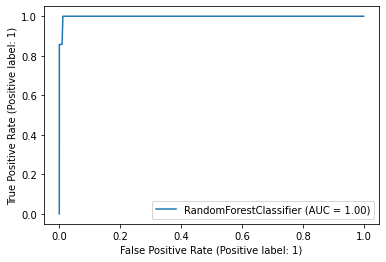

In [300]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

In [301]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [302]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[8103 1150]
 [   7    7]]
0.8751483759576993
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      9253
           1       0.01      0.50      0.01        14

    accuracy                           0.88      9267
   macro avg       0.50      0.69      0.47      9267
weighted avg       1.00      0.88      0.93      9267



0.6878579920025937

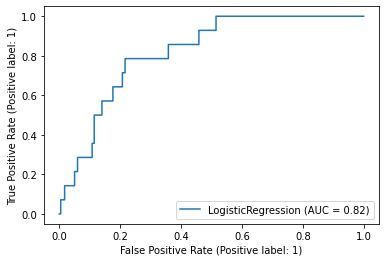

In [303]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None) 

In [304]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [305]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[9206   47]
 [   6    8]]
0.9942807812668609
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9253
           1       0.15      0.57      0.23        14

    accuracy                           0.99      9267
   macro avg       0.57      0.78      0.61      9267
weighted avg       1.00      0.99      1.00      9267



0.783174568865696

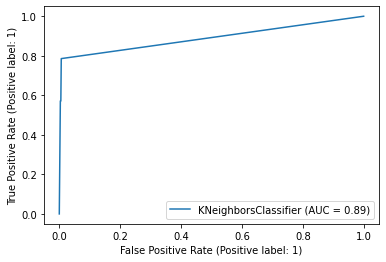

In [306]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None) 

In [307]:
svc = SVC()
svc.fit(X_train_res, y_train_res)

SVC()

In [308]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[9239   14]
 [   2   12]]
0.9982734434013165
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9253
           1       0.46      0.86      0.60        14

    accuracy                           1.00      9267
   macro avg       0.73      0.93      0.80      9267
weighted avg       1.00      1.00      1.00      9267



0.927814917169721

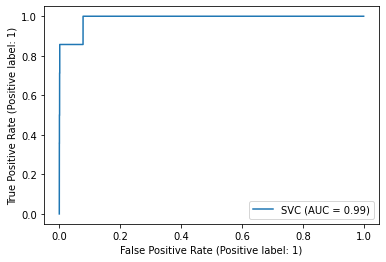

In [309]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None) 

In [310]:
import pickle
filename = 'SVC.pickle'
pickle.dump(svc, open(filename, 'wb'))

In [311]:
df= pd.read_csv('Testing_Original')
df

,Unnamed: 0,index,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,ingredients,url,partition,title,id,instructions,Serving,calories,Added_Sugar,Label_Number,Nutri_Score,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar
0,0,0,0,0,0,141798,34 lb butter (or margarine) 34 cup vegetable s...,http://www.food.com/recipe/chocolate-chip-cook...,train,Chocolate Chip Cookies,232bdd3f50,"[{'text': 'Combine as listed and shape into 2""...",2552.0,12305.3,Yes,15,D,High,Normal,Low,Low,High,Normal,High
1,1,1,1,1,1,141800,"12 green bell pepper, sliced 2 tablespoons oli...",http://www.food.com/recipe/bbq-ranch-quesadill...,train,BBQ Ranch Quesadilla Wedges,232bf902e5,[{'text': 'Stir fry peppers and onions in oil....,162.0,704.8,No,12,D,High,High,Low,Normal,High,Low,Low
2,2,2,2,2,2,141802,1 (16 ounce) bag frozen broccoli carrots cauli...,http://www.food.com/recipe/easy-cheesy-mixed-v...,train,Easy Cheesy Mixed Vegetable Casserole,232c1b51bf,"[{'text': 'Combine vegetables, soup, 1/2 cup s...",80.0,203.2,No,12,D,High,High,Low,Normal,High,Low,Low
3,3,3,3,3,3,141803,1 (6 ounce) box orange Jell-O 2 cups boiling w...,http://www.food.com/recipe/caribbean-sunset-je...,val,Caribbean Sunset Jell-O,232c1f5627,"[{'text': 'Make up the base, combining Jello w...",26.0,20.6,No,1,B,Low,Low,Low,Normal,Low,High,Normal
4,4,4,4,4,4,141804,"2 lbs beef tenderloin, trimmed and cubed into ...",http://www.food.com/recipe/middle-eastern-beef...,train,Middle Eastern Beef Kabobs,232c2df254,[{'text': 'Prepare your meat and vegetables by...,268.0,614.8,No,1,B,Normal,Normal,Low,High,High,Very Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,4956,4988,4995,995,4995,152047,3 cups self raising flour 1 pinch salt 50 g bu...,http://www.food.com/recipe/cheese-and-vegemite...,train,Cheese and Vegemite Scrolls,25c245a39e,[{'text': 'Sift flour and salt into a bowl the...,1009.0,279.0,No,-2,A,Low,Low,Low,Normal,Normal,Normal,Low
4957,4957,4989,4996,996,4996,152050,"2 (11 ounce) bags potato chips, plain (I prefe...",http://www.food.com/recipe/easy-flavored-potat...,test,Easy Flavored Potato Chips,25c267129c,"[{'text': 'Preheat oven to 350.'}, {'text': 'P...",665.0,313.5,No,0,B,Low,Low,Low,Low,High,Low,Low
4958,4958,4990,4997,997,4997,152051,1 cup no-salt-added ketchup 1 cup no-salt-adde...,http://www.food.com/recipe/low-sodium-barbecue...,train,Low Sodium Barbecue Sauce,25c29c60c1,[{'text': 'Mix together all ingredients in lar...,44.0,59.6,Yes,5,C,Low,Low,Low,Low,Low,High,High
4959,4959,4991,4998,998,4998,152055,12 lb fresh dungeness crab 1 package Anjou pea...,http://www.food.com/recipe/hickory-apple-smoke...,train,Hickory& Apple Smoked Crab Stuffed Chicken Bre...,25c2a8d792,[{'text': 'Mix the following in a small bowl.'...,141.0,389.4,No,0,B,Normal,Normal,Low,Very High,High,Very Low,Low


In [312]:
df.drop(['Unnamed: 0','index','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'], inplace=True,axis=1)

In [313]:
df

,ingredients,url,partition,title,id,instructions,Serving,calories,Added_Sugar,Label_Number,Nutri_Score,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar
0,34 lb butter (or margarine) 34 cup vegetable s...,http://www.food.com/recipe/chocolate-chip-cook...,train,Chocolate Chip Cookies,232bdd3f50,"[{'text': 'Combine as listed and shape into 2""...",2552.0,12305.3,Yes,15,D,High,Normal,Low,Low,High,Normal,High
1,"12 green bell pepper, sliced 2 tablespoons oli...",http://www.food.com/recipe/bbq-ranch-quesadill...,train,BBQ Ranch Quesadilla Wedges,232bf902e5,[{'text': 'Stir fry peppers and onions in oil....,162.0,704.8,No,12,D,High,High,Low,Normal,High,Low,Low
2,1 (16 ounce) bag frozen broccoli carrots cauli...,http://www.food.com/recipe/easy-cheesy-mixed-v...,train,Easy Cheesy Mixed Vegetable Casserole,232c1b51bf,"[{'text': 'Combine vegetables, soup, 1/2 cup s...",80.0,203.2,No,12,D,High,High,Low,Normal,High,Low,Low
3,1 (6 ounce) box orange Jell-O 2 cups boiling w...,http://www.food.com/recipe/caribbean-sunset-je...,val,Caribbean Sunset Jell-O,232c1f5627,"[{'text': 'Make up the base, combining Jello w...",26.0,20.6,No,1,B,Low,Low,Low,Normal,Low,High,Normal
4,"2 lbs beef tenderloin, trimmed and cubed into ...",http://www.food.com/recipe/middle-eastern-beef...,train,Middle Eastern Beef Kabobs,232c2df254,[{'text': 'Prepare your meat and vegetables by...,268.0,614.8,No,1,B,Normal,Normal,Low,High,High,Very Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,3 cups self raising flour 1 pinch salt 50 g bu...,http://www.food.com/recipe/cheese-and-vegemite...,train,Cheese and Vegemite Scrolls,25c245a39e,[{'text': 'Sift flour and salt into a bowl the...,1009.0,279.0,No,-2,A,Low,Low,Low,Normal,Normal,Normal,Low
4957,"2 (11 ounce) bags potato chips, plain (I prefe...",http://www.food.com/recipe/easy-flavored-potat...,test,Easy Flavored Potato Chips,25c267129c,"[{'text': 'Preheat oven to 350.'}, {'text': 'P...",665.0,313.5,No,0,B,Low,Low,Low,Low,High,Low,Low
4958,1 cup no-salt-added ketchup 1 cup no-salt-adde...,http://www.food.com/recipe/low-sodium-barbecue...,train,Low Sodium Barbecue Sauce,25c29c60c1,[{'text': 'Mix together all ingredients in lar...,44.0,59.6,Yes,5,C,Low,Low,Low,Low,Low,High,High
4959,12 lb fresh dungeness crab 1 package Anjou pea...,http://www.food.com/recipe/hickory-apple-smoke...,train,Hickory& Apple Smoked Crab Stuffed Chicken Bre...,25c2a8d792,[{'text': 'Mix the following in a small bowl.'...,141.0,389.4,No,0,B,Normal,Normal,Low,Very High,High,Very Low,Low


In [314]:
df_testing= df[['Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]


In [315]:
df_testing

,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar
0,High,Normal,Low,Low,High,Normal,High,Yes
1,High,High,Low,Normal,High,Low,Low,No
2,High,High,Low,Normal,High,Low,Low,No
3,Low,Low,Low,Normal,Low,High,Normal,No
4,Normal,Normal,Low,High,High,Very Low,Low,No
...,...,...,...,...,...,...,...,...
4956,Low,Low,Low,Normal,Normal,Normal,Low,No
4957,Low,Low,Low,Low,High,Low,Low,No
4958,Low,Low,Low,Low,Low,High,High,Yes
4959,Normal,Normal,Low,Very High,High,Very Low,Low,No


In [316]:
dictionary={'Yes':1,'No':0}
df_testing['Added_Sugar']=df_testing['Added_Sugar'].map(dictionary)


<ipython-input-316-61239521bfaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['Added_Sugar']=df_testing['Added_Sugar'].map(dictionary)


In [317]:
lis =['Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar']

dictionary_feat={'Very Low':0,'Low':1,'Normal':2,'High':3,'Very High':4}



In [318]:
for feature in lis:
    df_testing[feature]=df_testing[feature].map(dictionary_feat)

<ipython-input-318-d50323c9d84f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing[feature]=df_testing[feature].map(dictionary_feat)


In [319]:
df_testing

,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar
0,3,2,1,1,3,2,3,1
1,3,3,1,2,3,1,1,0
2,3,3,1,2,3,1,1,0
3,1,1,1,2,1,3,2,0
4,2,2,1,3,3,0,1,0
...,...,...,...,...,...,...,...,...
4956,1,1,1,2,2,2,1,0
4957,1,1,1,1,3,1,1,0
4958,1,1,1,1,1,3,3,1
4959,2,2,1,4,3,0,1,0


## Testing Model

In [340]:
def Question():
    
    df_testing['Diabetic']=input('Are You Diabetic Patient ?')
    df_testing['Hypertension'] = input('Are you suffering from Hypertension ?')
    df_testing['Hypotension'] = input('Do You have Hypotension?')
    df_testing['Smoking'] = input('Do you Smoke?')
    df_testing['Alcoholic'] = input('Are you Alcoholic?')
    
    
    dictionary={'Yes':1,'No':0}
    lis = ['Diabetic','Hypertension','Hypotension','Smoking','Alcoholic']
    
    for feature in lis:
        df_testing[feature]=df_testing[feature].map(dictionary)
        
    
    
    
    

In [341]:
Question()

Are You Diabetic Patient ?No
Are you suffering from Hypertension ?No
Do You have Hypotension?Yes
Do you Smoke?No
Are you Alcoholic?No


In [342]:
df_testing = df_testing[["Diabetic", "Hypertension", "Hypotension","Smoking",'Alcoholic','Saturated_Fat','Sodium','Fiber','Protein','Unsaturated_Fats','Carbohydrate','Sugar','Added_Sugar']]

In [343]:
df_testing

,Diabetic,Hypertension,Hypotension,Smoking,Alcoholic,Saturated_Fat,Sodium,Fiber,Protein,Unsaturated_Fats,Carbohydrate,Sugar,Added_Sugar
0,0,0,1,0,0,3,2,1,1,3,2,3,1
1,0,0,1,0,0,3,3,1,2,3,1,1,0
2,0,0,1,0,0,3,3,1,2,3,1,1,0
3,0,0,1,0,0,1,1,1,2,1,3,2,0
4,0,0,1,0,0,2,2,1,3,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,0,0,1,0,0,1,1,1,2,2,2,1,0
4957,0,0,1,0,0,1,1,1,1,3,1,1,0
4958,0,0,1,0,0,1,1,1,1,1,3,3,1
4959,0,0,1,0,0,2,2,1,4,3,0,1,0


In [344]:
import pickle
loaded_model = pickle.load(open('SVC.pickle', 'rb'))


In [345]:
import numpy as np
prediction=loaded_model.predict(df_testing)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [346]:
x = np.where(prediction == 1)
x

(array([  88,  432,  822, 1014, 2460, 2463, 2661, 3042, 3887, 4649],
       dtype=int64),)

In [347]:
# array_of_tuples = map(tuple, x)
# tuples = tuple(array_of_tuples)

In [348]:
# tuples

In [349]:

i = 0

while i<len(x):
    
    for m in x:
        
        for j in m:
            
            print('\n',
                  '\n',
                  'Ingredients:',df['ingredients'][j],
                  '\n',
                  '\n',  
                  'Title:',df['title'][j],
                  '\n',
                  '\n',
                  'Instructions:',df['instructions'][j],
                  '\n',
                  'Score:',df['Nutri_Score'][j],
                  '\n'
                  '----------------------------------------------------------------------------------------------------------')
        i += 1
    
 



 
 Ingredients: 13 cup ketchup 14 cup cider vinegar 14 cup canola oil 12 cup Worcestershire sauce 1 teaspoon lowry season salt 1 teaspoon dry mustard 1 teaspoon dry garlic powder 1 bay leaf 1 teaspoon lemon pepper seasoning 1 teaspoon hot chili powder 12 teaspoon paprika 1 large chicken bouillon cubes or 1 large vegetable bouillon cubes or 1 large beef bouillon cubes or 1 large fish bouillon cube (depending on what you're BBQing) 
 
 Title: Colonel Jim's Official Bbq Sauce 
 
 Instructions: [{'text': 'Toss it all in a pan.'}, {'text': 'Simmer till the oil separates 15- 20 minutes.'}] 
 Score: C 
----------------------------------------------------------------------------------------------------------

 
 Ingredients: 1 cup mayonnaise 13 cup French dressing 14 cup relish 1 tablespoon sugar 14 teaspoon pepper 1 teaspoon dried onion 
 
 Title: Mc Donald's Big Mac Sauce 
 
 Instructions: [{'text': 'Mix all ingredients.'}, {'text': 'Keep in fridge for up to 2 weeks.'}] 
 Score: D 
--------

In [310]:
# import re
# import requests
# from bs4 import BeautifulSoup as bs

# Sugar = []

# r = requests.get('https://sugarscience.ucsf.edu/hidden-in-plain-sight/#.YNHjEWgzZPZ')
# soup = bs(r.content,'html.parser')
# sugar = soup.find('div',{'class':'list sugar_list'})
# wow = sugar.find('ul')

# for i in range(0, 60):
#     sugar_list = wow.find_all('li')[i].get_text()
#     Sugar.append(sugar_list)
